# MSIN0097: Predictive Analytics Group Coursework

## The Effect of Spotify Playlists on Artist Success
<br> 
Group 1
<br>
Github Repository: https://github.com/sidnand24/MSIN0097-Group-Assignment---Spotify 
<br>
March 2022 

### Introduction

Spotify has become synonymous with music streaming in recent years and offers a platform for artists to gain exposure. Currently, Spotify holds the largest market share amongst music streaming platforms, securing approximately 31% of the market (Forde, 2022). Moreover, Spotify adopts different business strategies to enhance the customer experience. One of the most relevant one is the creation of playlists, which are a collection of songs from different artists grouped by certain features (e.g. genre or mood). Playlists have gained significant traction and can influence artist visibility and revenue. Specifically, when an artist is present in a top performing playlist, it is estimated that the aforementioned musician earns approximately $163,000 more (Nwansi, 2021). Thus, it follows that joining an acclaimed Spotify playlist represents a major turning point for artists, allowing them to increase streams, revenue and exposure.

#### Import Packages

In [1]:
# Install these packages if they aren't installed on OS
# !pip install joypy
# !pip install pyvis

In [2]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random
import calendar
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from joypy import joyplot
from pyvis.network import Network
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

import spotfunc as spotfunc_V2 # Additional functions provided

In [3]:
# # run if not on OS
# !pip install imblearn 
from imblearn.combine import SMOTEENN

### Data Understanding

In [4]:
# Read in the data
pd.set_option('display.max_columns', None) # To view all columns
df_clean = pd.read_csv("./Data/cleaned_data.csv", low_memory=False)
new_artists = pd.read_csv("./Data/newartists2015onwards.csv", low_memory=False)

In [5]:
df_clean.head()

Unnamed: 0  Unnamed: 0.1                  Unnamed: 0.1.1  day  \
0           0             9   ('small_artists_2016.csv', 9)   10   
1           1            19  ('small_artists_2016.csv', 19)   10   
2           2            29  ('small_artists_2016.csv', 29)   10   
3           3            39  ('small_artists_2016.csv', 39)   10   
4           4            49  ('small_artists_2016.csv', 49)   10   

            log_time  mobile                          track_id          isrc  \
0  20160510T12:15:00    True  8f1924eab3804f308427c31d925c1b3f  USAT21600547   
1  20160510T12:15:00    True  8f1924eab3804f308427c31d925c1b3f  USAT21600547   
2  20160510T14:00:00    True  8f1924eab3804f308427c31d925c1b3f  USAT21600547   
3  20160510T10:45:00    True  8f1924eab3804f308427c31d925c1b3f  USAT21600547   
4  20160510T10:15:00    True  8f1924eab3804f308427c31d925c1b3f  USAT21600547   

            upc       artist_name    track_name                 album_name  \
0  7.567991e+10  Sturgill Simpson  Call To Arms  A Sailor's Guide to Earth   
1  7.567991e+10  Sturgill Simpson  Call To Arms  A Sailor's Guide to Earth   
2  7.567991e+10  Sturgill Simpson  Call To Arms  A Sailor's Guide to Earth   
3  7.567991e+10  Sturgill Simpson  Call To Arms  A Sailor's Guide to Earth   
4  7.567991e+10  Sturgill Simpson  Call To Arms  A Sailor's Guide to Earth   

                        customer_id postal_code   access country_code gender  \
0  6c022a8376c10aae37abb839eb7625fe          NE     free           GB   male   
1  6c022a8376c10aae37abb839eb7625fe          NE     free           GB   male   
2  352292382ff3ee0cfd3b73b94ea0ff8f           1  premium           GB   male   
3  c3f2b54e76696ed491d9d8f964c97774          MK  premium           GB   male   
4  6a06a9bbe042c73e8f1a3596ec321636          KT  premium           GB   male   

   birth_year                    filename region_code  referral_code  \
0      1968.0  streams_20160510_GB.004.gz      GB-DUR            NaN   
1      1968.0  streams_20160510_GB.004.gz      GB-DUR            NaN   
2      1995.0  streams_20160510_GB.002.gz      GB-ESS            NaN   
3      1992.0  streams_20160510_GB.007.gz      GB-HRT            NaN   
4      1979.0  streams_20160510_GB.004.gz      GB-LND            NaN   

  partner_name financial_product user_product_type  offline_timestamp  \
0          NaN               NaN                ad                NaN   
1          NaN               NaN                ad                NaN   
2          NaN           student              paid                NaN   
3          NaN           student              paid                NaN   
4          NaN               NaN              paid                NaN   

   stream_length  stream_cached stream_source stream_source_uri stream_device  \
0          277.0            NaN         album               NaN        mobile   
1           53.0            NaN         album               NaN        mobile   
2          326.0            NaN    collection               NaN        mobile   
3          330.0            NaN    collection               NaN        tablet   
4           90.0            NaN    collection               NaN        mobile   

  stream_os                             track_uri     track_artists  source  \
0   Android  spotify:track:4m1opmaYT9zk5OP7IHUb9R  Sturgill Simpson     NaN   
1   Android  spotify:track:4m1opmaYT9zk5OP7IHUb9R  Sturgill Simpson     NaN   
2   Android  spotify:track:4m1opmaYT9zk5OP7IHUb9R  Sturgill Simpson     NaN   
3       iOS  spotify:track:4m1opmaYT9zk5OP7IHUb9R  Sturgill Simpson     NaN   
4       iOS  spotify:track:4m1opmaYT9zk5OP7IHUb9R  Sturgill Simpson     NaN   

              DateTime  hour  minute  week  month  year        date  weekday  \
0  2016-05-10 12:15:00    12      15    19      5  2016  2016-05-10        1   
1  2016-05-10 12:15:00    12      15    19      5  2016  2016-05-10        1   
2  2016-05-10 14:00:00    14       0    19      5  2016  2016-05-10        1   
3  2016-0

In [6]:
len(df_clean)

3805499

In [7]:
# Overview of the variables
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3805499 entries, 0 to 3805498
Data columns (total 45 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Unnamed: 0.1       int64  
 2   Unnamed: 0.1.1     object 
 3   day                int64  
 4   log_time           object 
 5   mobile             bool   
 6   track_id           object 
 7   isrc               object 
 8   upc                float64
 9   artist_name        object 
 10  track_name         object 
 11  album_name         object 
 12  customer_id        object 
 13  postal_code        object 
 14  access             object 
 15  country_code       object 
 16  gender             object 
 17  birth_year         float64
 18  filename           object 
 19  region_code        object 
 20  referral_code      float64
 21  partner_name       object 
 22  financial_product  object 
 23  user_product_type  object 
 24  offline_timestamp  float64
 25  stream_length     

In [8]:
# Closer look at numerical values
df_clean.describe()

Unnamed: 0  Unnamed: 0.1        day           upc    birth_year  \
count  3.805499e+06  3.805499e+06  3805499.0  3.805499e+06  3.795478e+06   
mean   1.902749e+06  1.902750e+07       10.0  2.389062e+11  1.990107e+03   
std    1.098553e+06  1.098553e+07        0.0  2.757391e+11  1.068282e+01   
min    0.000000e+00  9.000000e+00       10.0  1.686134e+10  1.867000e+03   
25%    9.513745e+05  9.513754e+06       10.0  7.567991e+10  1.987000e+03   
50%    1.902749e+06  1.902750e+07       10.0  1.902958e+11  1.993000e+03   
75%    2.854124e+06  2.854124e+07       10.0  1.902960e+11  1.997000e+03   
max    3.805498e+06  3.805499e+07       10.0  5.414940e+12  2.017000e+03   

       referral_code  offline_timestamp  stream_length  stream_cached  source  \
count            0.0                0.0   3.805499e+06            0.0     0.0   
mean             NaN                NaN   1.891587e+02            NaN     NaN   
std              NaN                NaN   6.105546e+01            NaN     NaN   
min              NaN                NaN   3.000000e+01            NaN     NaN   
25%              NaN                NaN   1.720000e+02            NaN     NaN   
50%              NaN                NaN   2.000000e+02            NaN     NaN   
75%              NaN                NaN   2.240000e+02            NaN     NaN   
max              NaN                NaN   9.000000e+02            NaN     NaN   

               hour        minute          week         month          year  \
count  3.805499e+06  3.805499e+06  3.805499e+06  3.805499e+06  3.805499e+06   
mean   1.373665e+01  2.254671e+01  2.316008e+01  5.970407e+00  2.016437e+03   
std    5.400456e+00  1.675157e+01  1.320996e+01  3.036840e+00  5.964080e-01   
min    0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00  2.014000e+03   
25%    1.000000e+01  1.500000e+01  1.400000e+01  4.000000e+00  2.016000e+03   
50%    1.400000e+01  3.000000e+01  2.300000e+01  6.000000e+00  2.016000e+03   
75%    1.800000e+01  4.500000e+01  3.200000e+01  8.000000e+00  2.017000e+03   
max    2.300000e+01  4.500000e+01  5.000000e+01  1.200000e+01  2.017000e+03   

            weekday  
count  3.805499e+06  
mean   2.837800e+00  
std    2.001057e+00  
min    0.000000e+00  
25%    1.000000e+00  
50%    3.000000e+00  
75%    5.000000e+00  
max    6.000000e+00

In [9]:
# Check proportion of missing values in each column
round((df_clean.isna().sum() / len(df_clean)) * 100 , 2)

Unnamed: 0             0.00
Unnamed: 0.1           0.00
Unnamed: 0.1.1         0.00
day                    0.00
log_time               0.00
mobile                 0.00
track_id               0.00
isrc                   0.00
upc                    0.00
artist_name            0.00
track_name             0.00
album_name             0.00
customer_id            0.00
postal_code           35.53
access                 0.00
country_code           0.00
gender                 1.06
birth_year             0.26
filename               0.00
region_code            6.88
referral_code        100.00
partner_name          88.78
financial_product     61.20
user_product_type      0.60
offline_timestamp    100.00
stream_length          0.00
stream_cached        100.00
stream_source          0.00
stream_source_uri     72.57
stream_device          0.00
stream_os              0.00
track_uri              0.00
track_artists          0.00
source               100.00
DateTime               0.00
hour                

Using the newartists2015onwards.csv supplementary dataset, only the artists that have released music since 2015 are included for this study. This was done based on the is due to the probable increase in importance of Spotify to these artists in order to attract new listeners.

In [10]:
# Use spotfunc module to clean artist names
new_artists = spotfunc_V2.clean_artist_names(new_artists, 'LEGAL_NAME')
df_clean = spotfunc_V2.clean_artist_names(df_clean, 'artist_name')

# Merge dataframes to keep only select artists and those with values for origin code and major genre
new_artists = new_artists.dropna(subset = ['COUNTRY_OF_ORIGIN_CODE', 'MAJOR_GENRE_CODE'])
new_artists = new_artists[['cleaned_names', 'COUNTRY_OF_ORIGIN_CODE', 'MAJOR_GENRE_CODE']]

df_clean = df_clean[df_clean.cleaned_names.isin(new_artists.cleaned_names)]
df_clean = df_clean.merge(new_artists, on = 'cleaned_names', how='left')
df_clean = df_clean.drop('artist_name', axis=1)

In [11]:
len(df_clean)

3004861

In [12]:
# Clean column names for ease of reference
df_clean.columns = map(str.lower, df_clean.columns)

### Explanatory Data Analysis

In [13]:
# Create variable for current age of listeners
df_clean['age'] = df_clean.year - df_clean.birth_year
df_clean['age'] = df_clean['age'].astype('Int64')
df_clean.age.describe()

count    2.996741e+06
mean     2.642317e+01
std      1.073533e+01
min      0.000000e+00
25%      1.900000e+01
50%      2.300000e+01
75%      3.000000e+01
max      1.500000e+02
Name: age, dtype: float64

In [14]:
# Skewness of age
round((df_clean.age).skew(), 2)

2.31

The values for age depict a positively skewed distirbution. This is expected due to the greater proportion of younger listeners in the dataset. Furthermore, the distribution depict misspecified values (i.e. values above 100), which will need to be removed.

In [15]:
# Remove ages above 100 for analysis
old_length = len(df_clean)
df_data = df_clean[df_clean.age < 100].copy()

print(f'Number of rows dropped: {old_length - len(df_data)}')

Number of rows dropped: 15421


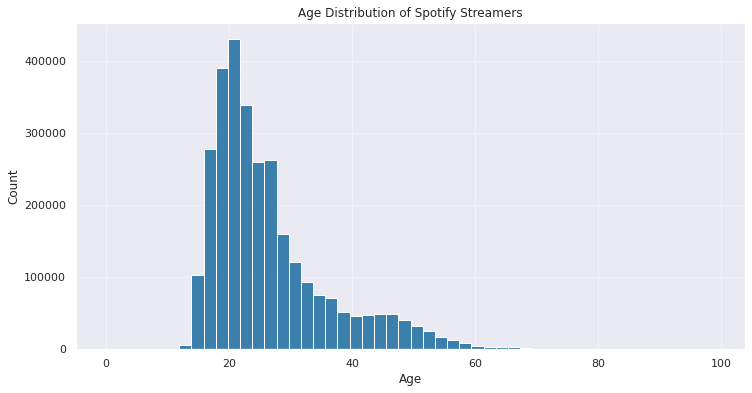

In [16]:
sns.set_theme(style='darkgrid')
plt.figure(figsize= (12,6))
fig = sns.histplot(data = df_data, x='age', bins=50, color='#005b96')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Spotify Streamers')
plt.grid(True, alpha = 0.4)

plt.show()

In [17]:
gender_split = df_data[['customer_id', 'gender']].drop_duplicates()
gender_split = gender_split.groupby('gender').nunique().rename(columns = {'customer_id': 'No. of listeners'})
gender_split

No. of listeners
gender                  
female            917249
male              841177

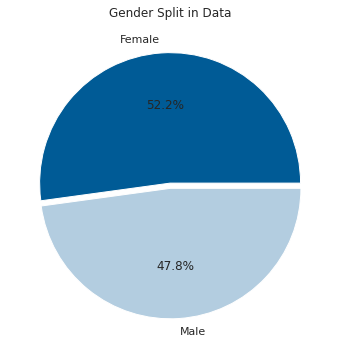

In [18]:
plt.figure(figsize= (6,6))
plt.title('Gender Split in Data')
explode = (0.02,0.02)
plt.pie(gender_split['No. of listeners'].values, labels = ['Female', 'Male'], colors = ['#005b96', '#b3cde0'], autopct = '%1.1f%%', explode=explode)

plt.show()

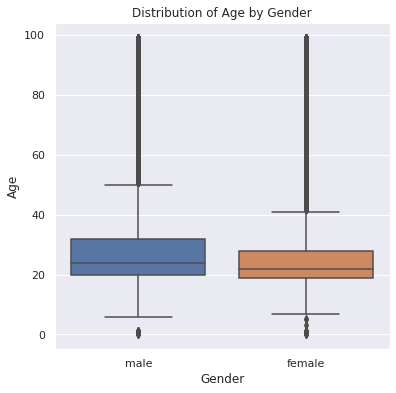

In [19]:
# Relationship between age and gender within the Dataset 
plt.figure(figsize= (6,6))
plt.title("Distribution of Age by Gender")
sns.boxplot(x=df_data["gender"], y=df_data['age'], orient='v')
plt.xlabel('Gender')
plt.ylabel('Age')

plt.show()

When analysing the distirbution of the consumers' gender, it can be seen that there is a slightly higher number of females. Furthermore, the box plot portrays a slightly higher average age for males. Both distirbutions do not indicate imbalances in the dataset, suggesting that no further cleaning for the demographic variables is required.

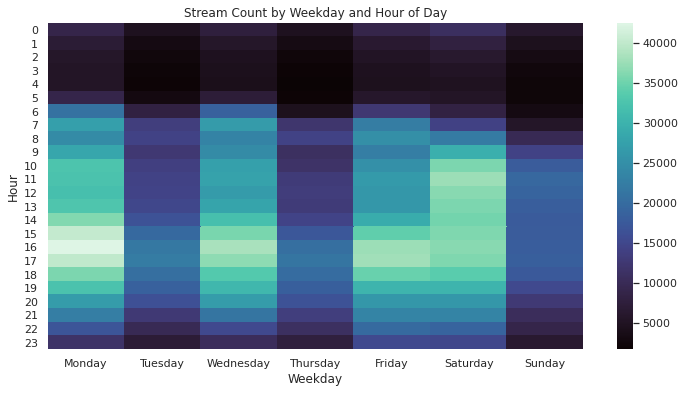

In [20]:
# Plot of streaming count by time and day of week - inspired by https://github.com/achilleasatha/UCL-MSING056-Predictive-Analytics
days = [calendar.day_name[i] for i in range(7)]
time_data = df_data[['hour', 'weekday_name']].copy()
time_data['weekday_name'] = pd.Categorical(time_data['weekday_name'], categories=days, ordered=True)

day_hour = time_data.sort_values(['weekday_name', 'hour'], ascending = [True, False])
hour_plot = (day_hour.groupby(['hour' , 'weekday_name'])).size().unstack().fillna(0)

plt.figure(figsize= (12,6))
sns.heatmap(hour_plot, cmap = 'mako').set_title('Stream Count by Weekday and Hour of Day')
plt.xlabel('Weekday')
plt.ylabel('Hour')

plt.show()

The above figure highlights the change in stream counts for each day of the week. It is evident that the higher number of streams occur between 2pm and 6pm. The days which have more streaming activity are: Monday, Wednesday, Friday and Saturday. Unexpectedly, Sunday depicts a low activity. This is counterintuitive insofar we would expect more individuals to relax on Sunday and listen to music.

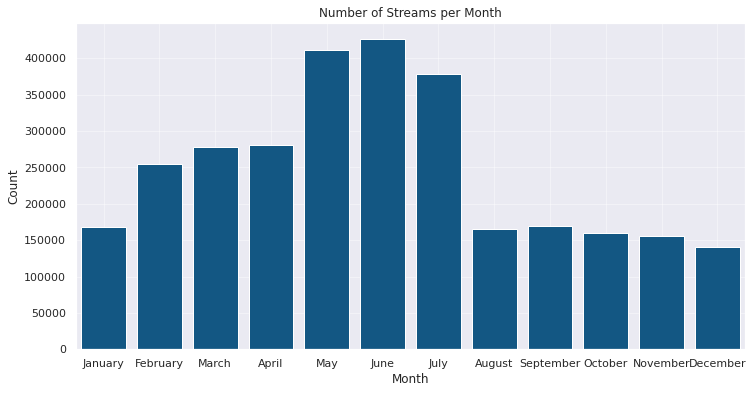

In [21]:
# Plot of streaming count per month
months = [calendar.month_name[i] for i in range(1,13)]
month_split = df_data.groupby(['month']).size().reset_index(name='Count')

plt.figure(figsize= (12,6))
sns.barplot(x=months, y='Count', data=month_split, color='#005b96')
plt.xlabel('Month')
plt.title('Number of Streams per Month')
plt.grid(True, alpha = 0.4)

plt.show()

When assessing the distribution of streams per month, there is an apperent presence of seasonality. Specifically, the plot depicts that the number of streams increase during the spring and summer months. This is expected insofar the dataset is characterised by younger individuals and we would expect younger consumers to be out more often during the aformentioned months. This suggests that release date may be an important feature in determining artist success.

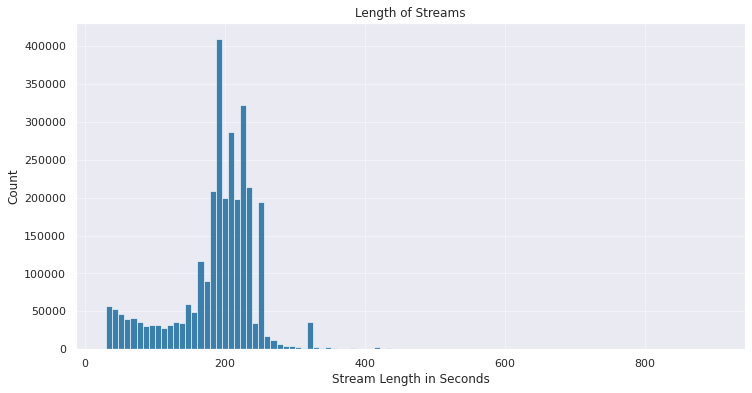

In [22]:
plt.figure(figsize= (12,6))
sns.histplot(data=df_data, x='stream_length', bins=100, color = '#005b96')
plt.xlabel('Stream Length in Seconds')
plt.title('Length of Streams')
plt.grid(True, alpha = 0.4)
plt.show()

Looking at the average length of streams across the dataset, the majority of streams are just over 3 minutes long. Artists may seek to release songs around this length to maximise their potential for success.

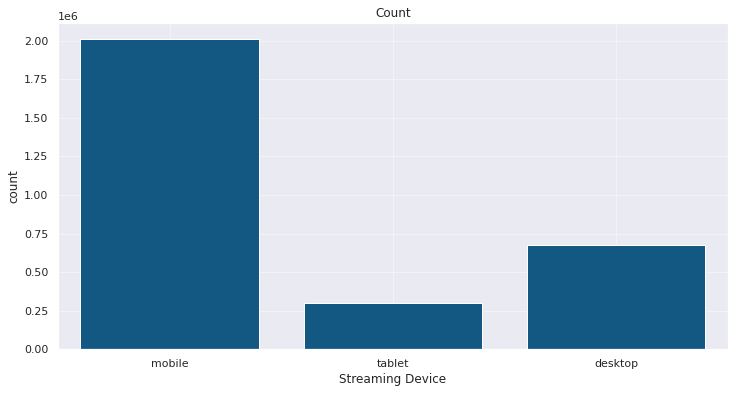

In [23]:
# Plot of how users are listening to artists within the dataset
plt.figure(figsize= (12,6))
sns.countplot(data = df_data, x='stream_device', color = '#005b96')
plt.xlabel('Streaming Device') 
plt.title('Count')
plt.grid(True, alpha = 0.4)
plt.show()

The majority of listeners use mobile devices to stream. This might imply that the majority of the users use Spotify during leiusure times. However, this would require further data to assert this.

In [24]:
genre_split = df_data[['major_genre_code', 'customer_id']].drop_duplicates()
genre_split = genre_split.groupby('major_genre_code').nunique().rename(columns = {'customer_id': 'No. of listeners'})
genre_split.reset_index(inplace=True)

In [25]:
genre_split.sort_values(by = ['No. of listeners'], inplace = True, ascending=False)
top_ten_genre = genre_split.iloc[1:10]

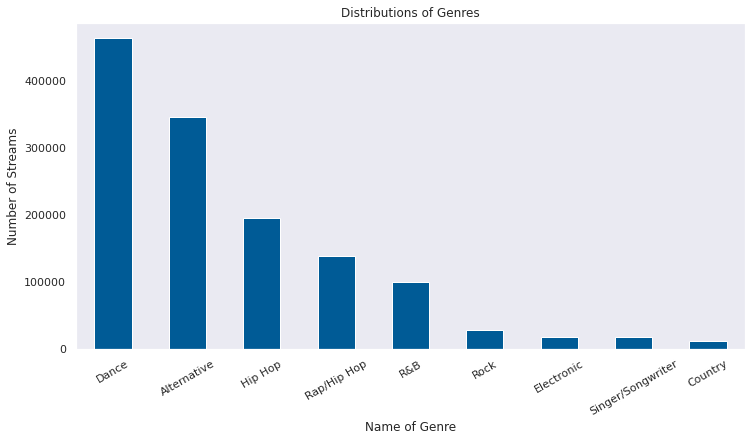

In [26]:
top_ten_genre.plot(kind = 'bar', x='major_genre_code', figsize=(12, 6),color='#005b96', legend = False)
plt.title('Distributions of Genres')
plt.grid(False)
plt.xlabel("Name of Genre")
plt.xticks(rotation=30)
plt.ylabel('Number of Streams')

plt.show()

Following an analysis of the distirbution of streams per genre, it can be seen that the most streamed categories are Dance, Alternative and Hip Hop. These features might suggest that artist that fall within these genres might have higher instances of success compared to others. On the other hand, genres such as Country and\ or Electronic might be very niche and only attract a few number of consumers. This implies that artists within these categories might not be profitable for record labels.

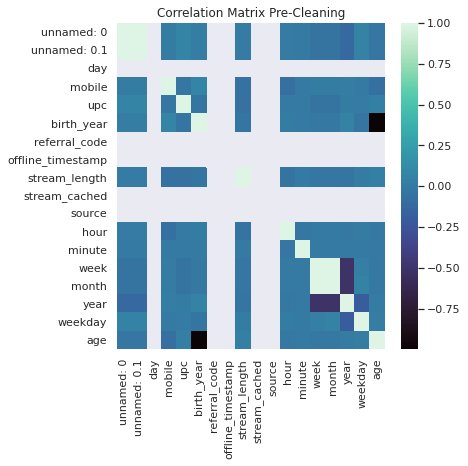

In [27]:
# Correlation matrix pre-cleaning
corr = df_data.corr()
plt.figure(figsize= (6,6))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap = 'mako')
plt.title('Correlation Matrix Pre-Cleaning')

plt.show()

In [28]:
# Dropping columns that are not relevant (over 80% missing, highly correlated or unusable columns)
df_data = df_data.drop(columns = ['unnamed: 0', 'unnamed: 0.1', 'unnamed: 0.1.1', 'day', 'referral_code', 'offline_timestamp',
                                    'stream_cached', 'birth_year', 'week', 'month', 'weekday', 'source'])

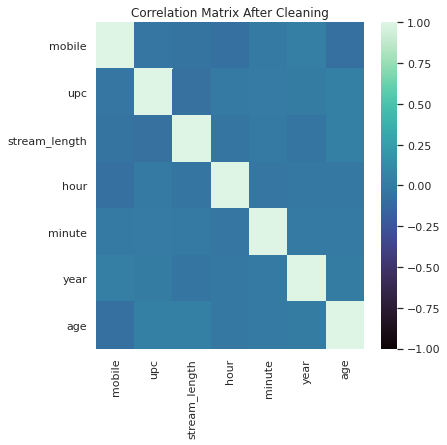

In [29]:
# Correlation matrix
corr2 = df_data.corr()
plt.figure(figsize= (6,6))
sns.heatmap(corr2, vmin=-1, vmax=1, xticklabels=corr2.columns.values, yticklabels=corr2.columns.values, cmap = 'mako')
plt.title("Correlation Matrix After Cleaning")

plt.show()

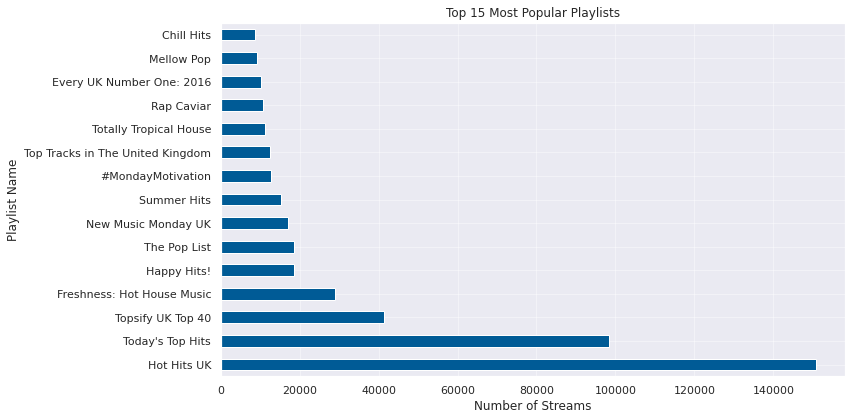

In [30]:
# Plot of 15 most streamed playlists 
playlist_pop = pd.DataFrame(df_data['playlist_name'].value_counts())
playlist_pop = playlist_pop.drop(playlist_pop.index[15:] )
playlist_pop = playlist_pop.rename(columns = {'playlist_name':'Popularity of Streaming'})
playlist_pop.plot(kind = 'barh', figsize=(12, 6), color =  '#005b96', legend=False)
plt.title('Top 15 Most Popular Playlists')
plt.grid(True, alpha = 0.4)
plt.xlabel("Number of Streams")
plt.ylabel('Playlist Name')
plt.tight_layout()

plt.show()

The Hot Hits UK playlist is the most popular playlist in the dataset.

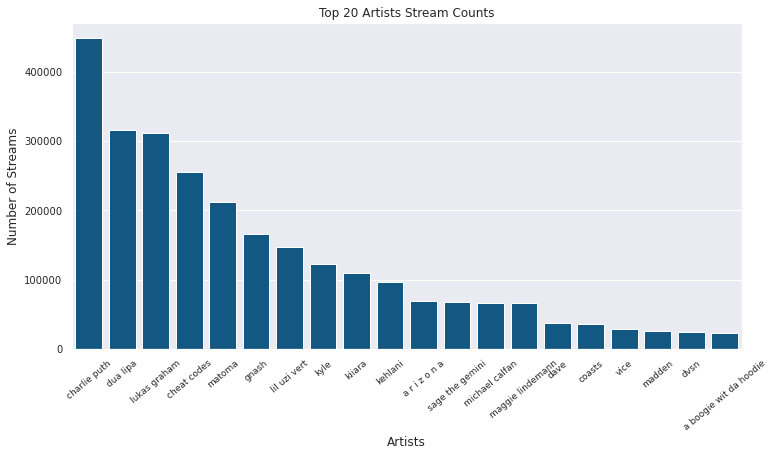

In [31]:
# plot of top 20 most streamed artists
# Group by the artist
artist= df_clean['cleaned_names'].value_counts().reset_index().rename(columns = {"index": "artist", "cleaned_names": "stream_count"})
top_artist = artist[:20]

# top artist streams 
plt.figure(figsize= (12, 6))
f2 = sns.barplot(x=top_artist.artist, y=top_artist.stream_count, color = '#005b96').set_title('Top 20 Artists Stream Counts')

plt.xticks(fontsize=9,rotation=40)
plt.yticks(fontsize=10)
plt.xlabel('Artists')
plt.ylabel('Number of Streams')

plt.show()

The top 2 most streamed artists within the study are Charlie Puth and Dua Lipa.

### Data Preparation and Feature Engineering
<br>
According to our business understanding, an artist is considered successful if present in one of the 4 key playlists. Therefore, we can begin the feature engineering process by subsetting the 4 key playlists we are interested in and by further creating a binary dependent variable which takes a value of 1 if the artist is successful and a value of 0 if the artist is not successful.

In [32]:
# select relevant playlists 
target_playlists = ['Hot Hits UK', 'Massive Dance Hits', 'The Indie List', 'New Music Friday']

df_data['success'] = np.where(df_data.playlist_name.isin(target_playlists), 1, 0) 
df_data['success'].value_counts() 

0    2833698
1     155742
Name: success, dtype: int64

In [33]:
# number of unique successful artists
df_data.groupby('success').cleaned_names.nunique()

success
0    444
1     55
Name: cleaned_names, dtype: int64

Following the definition of the dependent variable (i.e. whether an artist is successful or not), we can proceed with the feature engineering by generating a set of additional features. The features shall be based on characteristics we believe to be important in explaining success.

In [34]:
# select relevant playlists 
df_playlists = df_data[df_data['playlist_name'].isin(target_playlists)]

df_playlists = df_playlists[['playlist_name', 'stream_length']]
df_playlists = df_playlists[df_playlists['stream_length'] < 400]

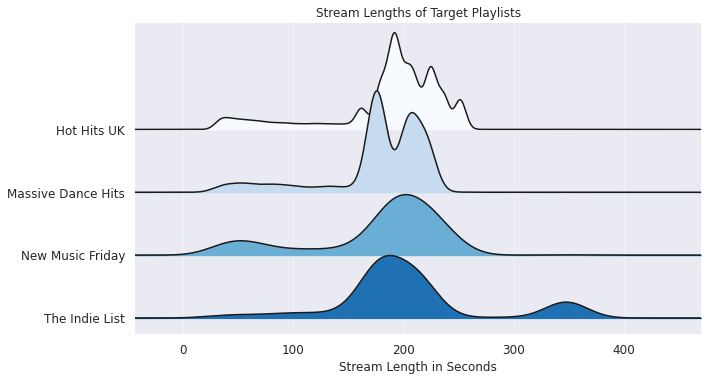

In [140]:
# Plot of stream length for the 4 target playlists
joyplot(df_playlists, by = 'playlist_name', column = 'stream_length', colormap=matplotlib.cm.Blues,  figsize = (10,5))
plt.xlabel('Stream Length in Seconds') 
plt.title('Stream Lengths of Target Playlists')
plt.grid(True, alpha = 0.4)

plt.show()

When assessing the stream length of the 4 target playlists, the stream length distribution for each appears to peak around 200 seconds. The distrubtions are relatively similar, however, 'The Indie List' depicts another peak at around 350 seconds.

### Network Analysis - Playlists

In [36]:
# Selecting the top 50 most streamed playlists plus New Music Friday and The Indie List
df_playlist_streams = df_data.groupby(['playlist_name']).size().reset_index(name='Playlist_streams')
df_playlist_streams_50 = df_playlist_streams.sort_values(by='Playlist_streams', ascending = False).head(50)
df_playlist_streams_50 = list(df_playlist_streams_50['playlist_name'].unique())
df_playlist_streams_50.append('New Music Friday')
df_playlist_streams_50.append('The Indie List')
df_playlist_streams_50 = df_data[df_data['playlist_name'].isin(df_playlist_streams_50)]

In [37]:
df_playlists_customers = pd.DataFrame(df_playlist_streams_50.groupby('playlist_name')['customer_id'].agg(list))
df_playlists_customers.reset_index(inplace=True)

In [38]:
# Create dataframe with each playlist and combinations
df_playlist_combs = pd.DataFrame(list(itertools.combinations(df_playlists_customers['playlist_name'], 2)),columns=['playlist1','playlist2'])

In [39]:
# Get customer IDs that listen to each playlist
network_data = pd.merge(df_playlist_combs, df_playlists_customers, left_on='playlist1', right_on = 'playlist_name')
network_data = network_data.drop('playlist_name', axis=1).rename(columns={'customer_id': 'customer_id1'})

network_data = pd.merge(network_data, df_playlists_customers, left_on='playlist2', right_on = 'playlist_name')
network_data = network_data.drop('playlist_name', axis=1).rename(columns={'customer_id': 'customer_id2'})

network_data

playlist1                       playlist2  \
0                 #MondayMotivation   100 Most Uplifting Songs Ever   
1                 #MondayMotivation                 Acoustic Covers   
2     100 Most Uplifting Songs Ever                 Acoustic Covers   
3                 #MondayMotivation                 All New All Now   
4     100 Most Uplifting Songs Ever                 All New All Now   
...                             ...                             ...   
1321              Topsify UK Top 40  You've Got Male - R&B: The Men   
1322         Totally Tropical House  You've Got Male - R&B: The Men   
1323                 UK Top 40 2016  You've Got Male - R&B: The Men   
1324          United Kingdom Top 50  You've Got Male - R&B: The Men   
1325                  You Can Do It  You've Got Male - R&B: The Men   

                                           customer_id1  \
0     [068f20cfc73fd9c7c192b42f4155166e, 3a01f8ddbfe...   
1     [068f20cfc73fd9c7c192b42f4155166e, 3a01f8ddbfe...   
2     [ef60ad629d9301968158f5aa1c4aec6a, c48ce1ee4cd...   
3     [068f20cfc73fd9c7c192b42f4155166e, 3a01f8ddbfe...   
4     [ef60ad629d9301968158f5aa1c4aec6a, c48ce1ee4cd...   
...                                                 ...   
1321  [ce1a67dac53ced25183d44df336c6d6e, b6265a5ffa1...   
1322  [1e19b140ece0655a2278a8528e8d1f15, 1b46f3098d3...   
1323  [1da59b44b725d1bbf807f7d55c94ab6d, 66f8d6ee5c1...   
1324  [a0e0083d12985e3de3320a88ad1801e0, efe40dc1640...   
1325  [0f5587b65c594cec23a597064ac860b9, 01ac51eab62...   

                                           customer_id2  
0     [ef60ad629d9301968158f5aa1c4aec6a, c48ce1ee4cd...  
1     [10af4e50446b285eb1bd000301f0027b, 125e39395ad...  
2     [10af4e50446b285eb1bd000301f0027b, 125e39395ad...  
3     [7703b61ca941b4194bc3012df348901b, 672e18304c0...  
4     [7703b61ca941b4194bc3012df348901b, 672e18304c0...  
...                                                 ...  
1321  [1ce89a9472983287d7f2ba08222a8691, f50ca510ab4...  
1322  [1ce89a9472983287d7f2ba08222a8691, f50ca510ab4...  
1323  [1ce89a9472983287d7f2ba08222a8691, f50ca510ab4...  
1324  [1ce89a9472983287d7f2ba08222a8691, f50ca510ab4...  
1325  [1ce89a9472983287d7f2ba08222a8691, f50ca510ab4...  

[1326 rows x 4 columns]

In [40]:
# Calculate the number of shared customers between each combination and only keep those with more than 20 for ease of plot
network_data['customers_shared'] = [len(set(a).intersection(b)) for a, b in zip(network_data.customer_id1, network_data.customer_id2)]
network_data2 = network_data[network_data['customers_shared'] > 20]

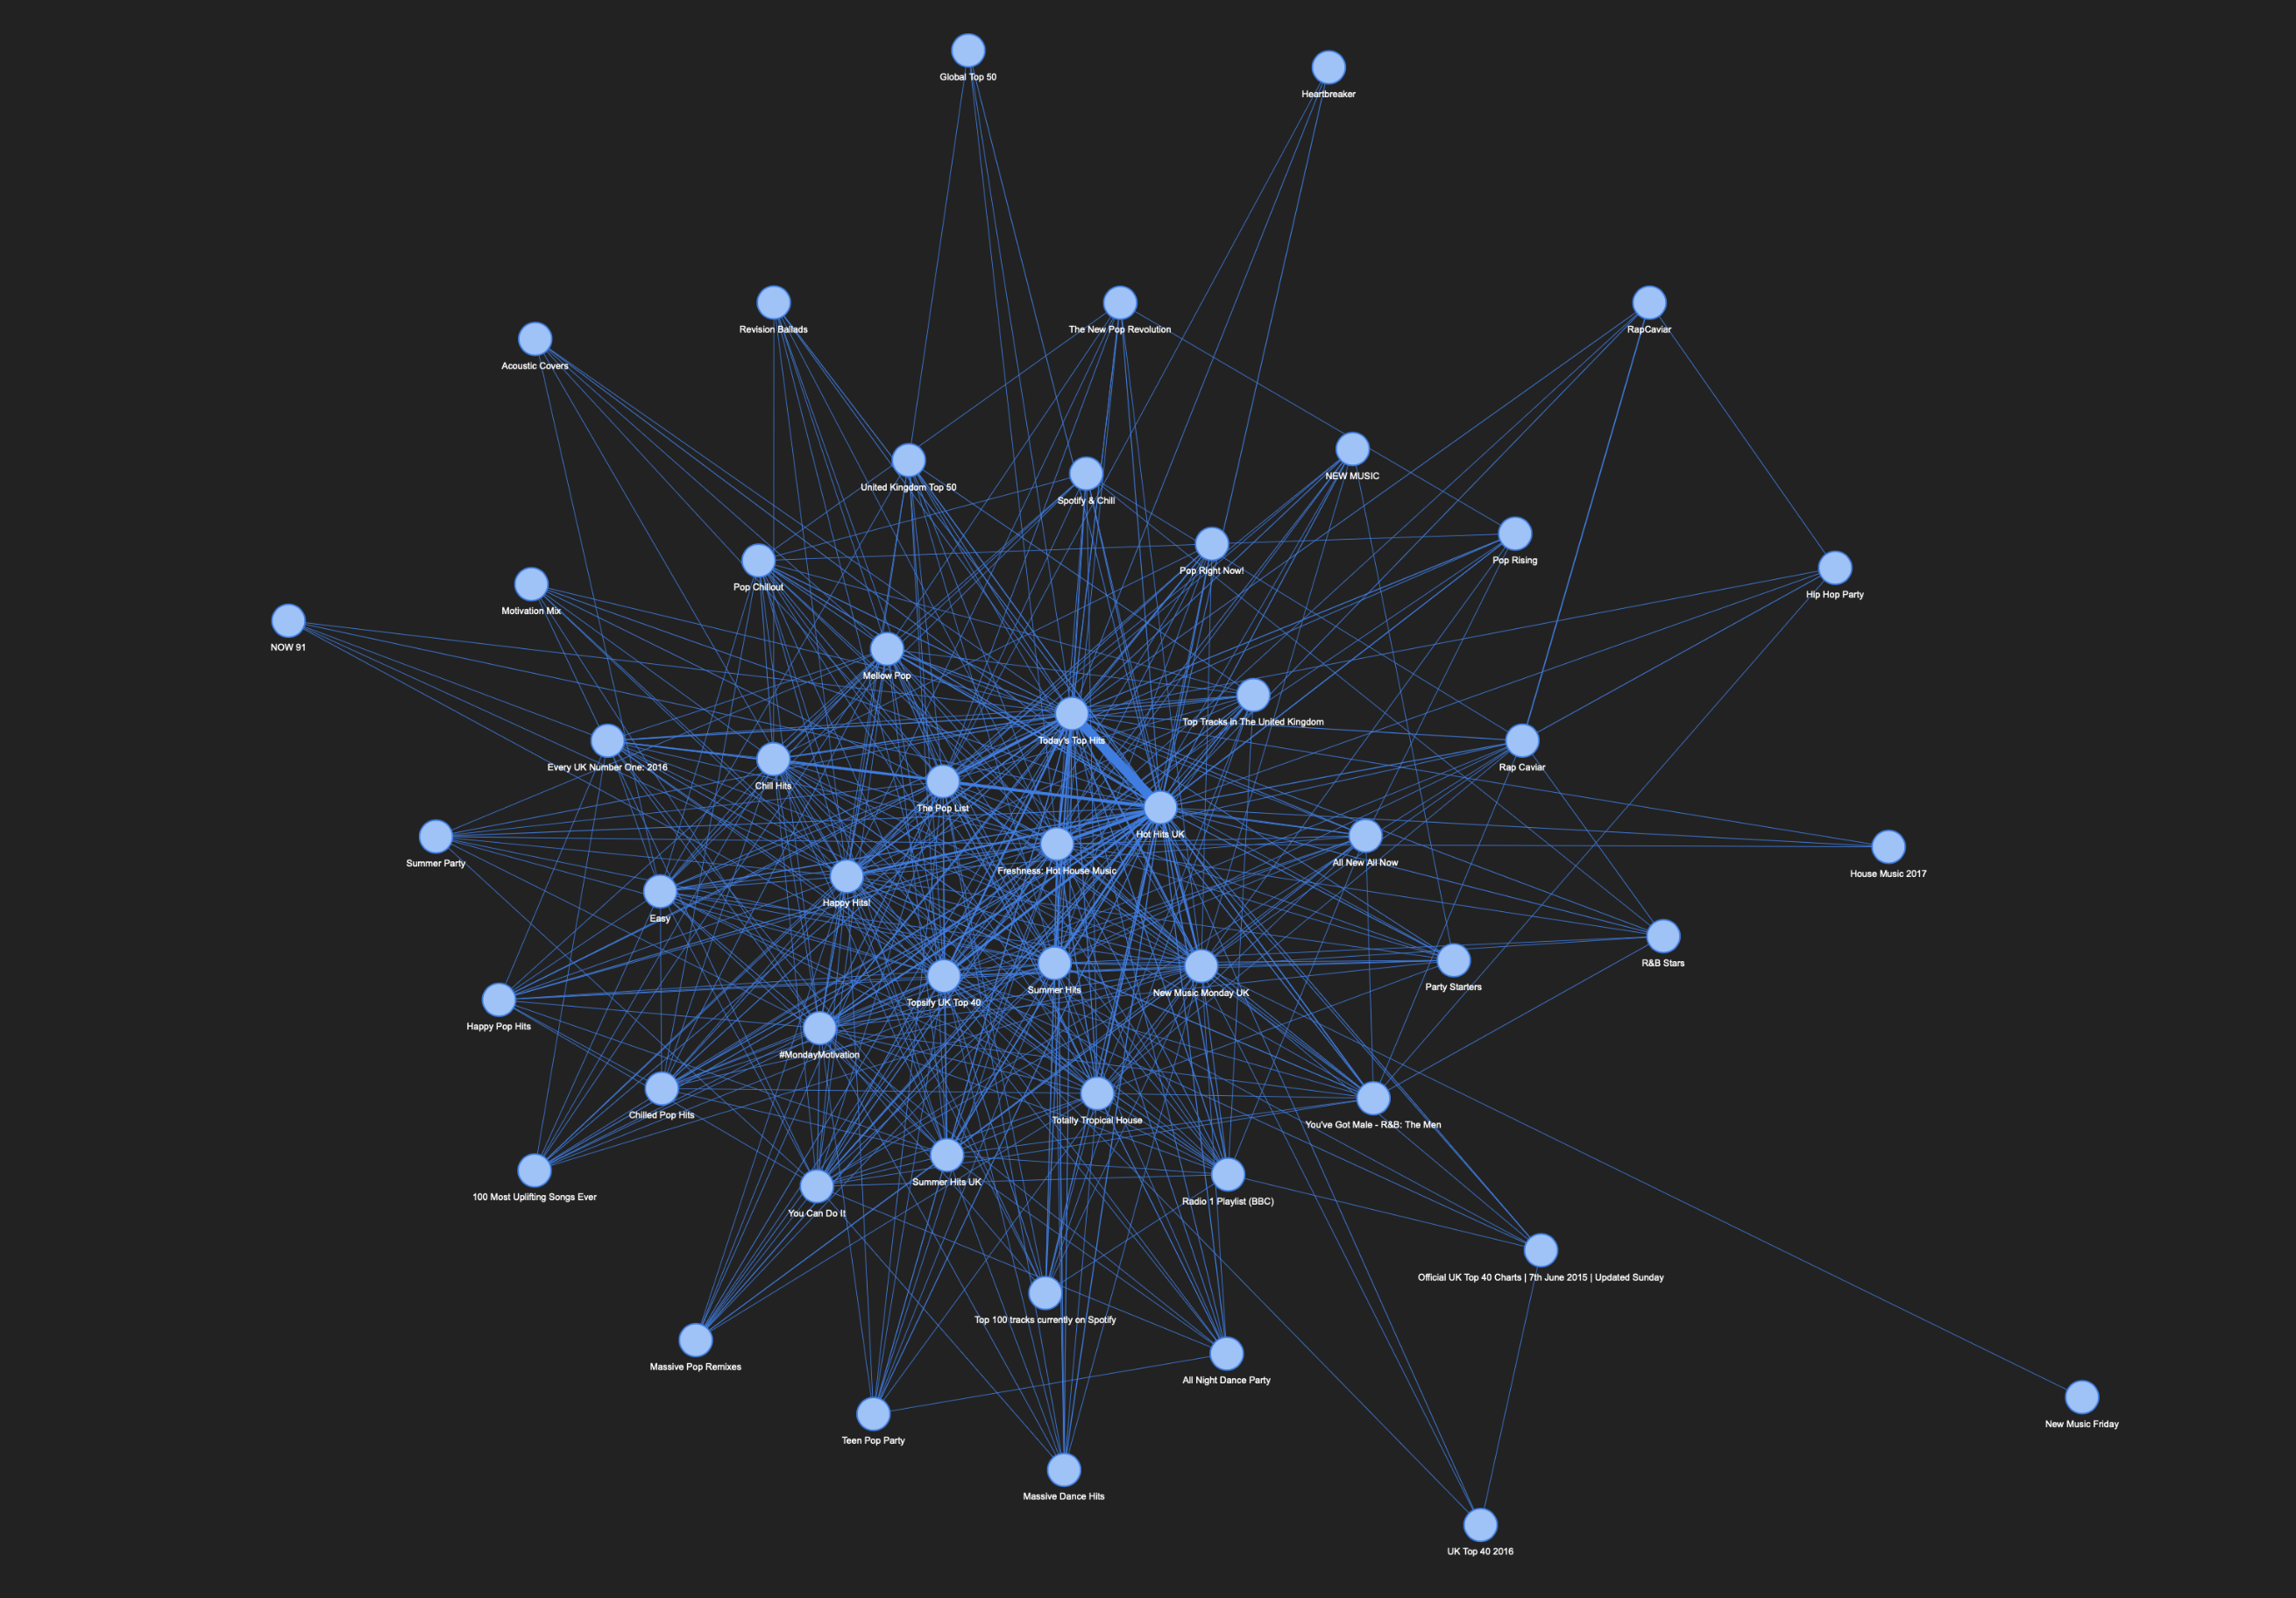

In [41]:
playlist_net = Network(height='1200px', width='100%', bgcolor='#222222', font_color='white', notebook=True)
playlist_net.barnes_hut()

sources = network_data2['playlist1']
targets = network_data2['playlist2']
weights = network_data2['customers_shared']

edge_data = zip(sources, targets, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]

    playlist_net.add_node(src, src, title=src, labels = True)
    playlist_net.add_node(dst, dst, title=dst, labels = True)
    playlist_net.add_edge(src, dst, value=w)

neighbor_map = playlist_net.get_adj_list()
# playlist_net.show('playlist_network.html') # Interactive Plot
Image(filename='Playlist_network.png')

The plot of the network indicates how the playlists are linked in terms of how many customers they share. Hot Hits UK seems to have the largest degree centrality with a lot of connections. This is expected as it is the most streamed playlist. On the other hand, New Music Friday only depicts one link. This entails that there is only one occurence of 20 people listening to New Music Friday and another playlist. 

### Network Analysis - Artists

A random sample of 100 artists were selected in order to easily view the network diagram.

In [42]:
df_artists_full = list(df_data['cleaned_names'].unique())
random.seed(80)
df_artists_sample = random.sample(df_artists_full, 100)

df_artists_50 = df_data[df_data['cleaned_names'].isin(df_artists_sample)]

In [43]:
df_artists_customers = pd.DataFrame(df_artists_50.groupby('cleaned_names')['customer_id'].agg(list))
df_artists_customers.reset_index(inplace=True)

In [44]:
# Create dataframe with each artist and combinations
df_artist_combs = pd.DataFrame(list(itertools.combinations(df_artists_customers['cleaned_names'], 2)),columns=['artist1','artist2'])

In [45]:
# Get customer IDs that listen to each artist
network_data_art = pd.merge(df_artist_combs, df_artists_customers, left_on='artist1', right_on = 'cleaned_names')
network_data_art = network_data_art.drop('cleaned_names', axis=1).rename(columns={'customer_id': 'customer_id1'})

network_data_art = pd.merge(network_data_art, df_artists_customers, left_on='artist2', right_on = 'cleaned_names')
network_data_art = network_data_art.drop('cleaned_names', axis=1).rename(columns={'customer_id': 'customer_id2'})

network_data_art

artist1                 artist2  \
0                  2d                     3js   
1                  2d  a boogie wit da hoodie   
2                 3js  a boogie wit da hoodie   
3                  2d                alcatraz   
4                 3js                alcatraz   
...               ...                     ...   
4945      torro torro        zbigniew kurtycz   
4946            train        zbigniew kurtycz   
4947  utha likumahuwa        zbigniew kurtycz   
4948            vimic        zbigniew kurtycz   
4949    willy william        zbigniew kurtycz   

                                           customer_id1  \
0                    [1d72799c92304276c95424c8d9d4a1be]   
1                    [1d72799c92304276c95424c8d9d4a1be]   
2     [c231c88587873938410cd8467800eb7c, 35685fddf69...   
3                    [1d72799c92304276c95424c8d9d4a1be]   
4     [c231c88587873938410cd8467800eb7c, 35685fddf69...   
...                                                 ...   
4945  [10ed06c7c32c678a1c0cda539baf89f0, 1286418735a...   
4946  [cac98b6a2677622e94c57ff05e2a2abd, d32de4df545...   
4947  [7e20636466ccec77d843b05d5f6def4c, 3832f817830...   
4948  [527df7bd23be1ef2be4f5a8d634e9569, 7c38aacef4a...   
4949  [a9949b750f514540a0c459a6e0445909, e4b10fa28db...   

                                           customer_id2  
0     [c231c88587873938410cd8467800eb7c, 35685fddf69...  
1     [2f19fc5c58dd2b76ac3b5a29f417e7f2, e855fdcb1c3...  
2     [2f19fc5c58dd2b76ac3b5a29f417e7f2, e855fdcb1c3...  
3     [2cfd61ad1add860e5033e65e1bbb1349, 84261628e31...  
4     [2cfd61ad1add860e5033e65e1bbb1349, 84261628e31...  
...                                                 ...  
4945  [9bcb39f330a70a84fbcbf494f77eab40, bf76d7a1a84...  
4946  [9bcb39f330a70a84fbcbf494f77eab40, bf76d7a1a84...  
4947  [9bcb39f330a70a84fbcbf494f77eab40, bf76d7a1a84...  
4948  [9bcb39f330a70a84fbcbf494f77eab40, bf76d7a1a84...  
4949  [9bcb39f330a70a84fbcbf494f77eab40, bf76d7a1a84...  

[4950 rows x 4 columns]

In [46]:
# Calculate the number of shared customers between each combination and only keep those with more than 10
network_data_art['customers_shared'] = [len(set(a).intersection(b)) for a, b in zip(network_data_art.customer_id1, network_data_art.customer_id2)]
network_data_art2 = network_data_art[network_data_art['customers_shared'] > 10]

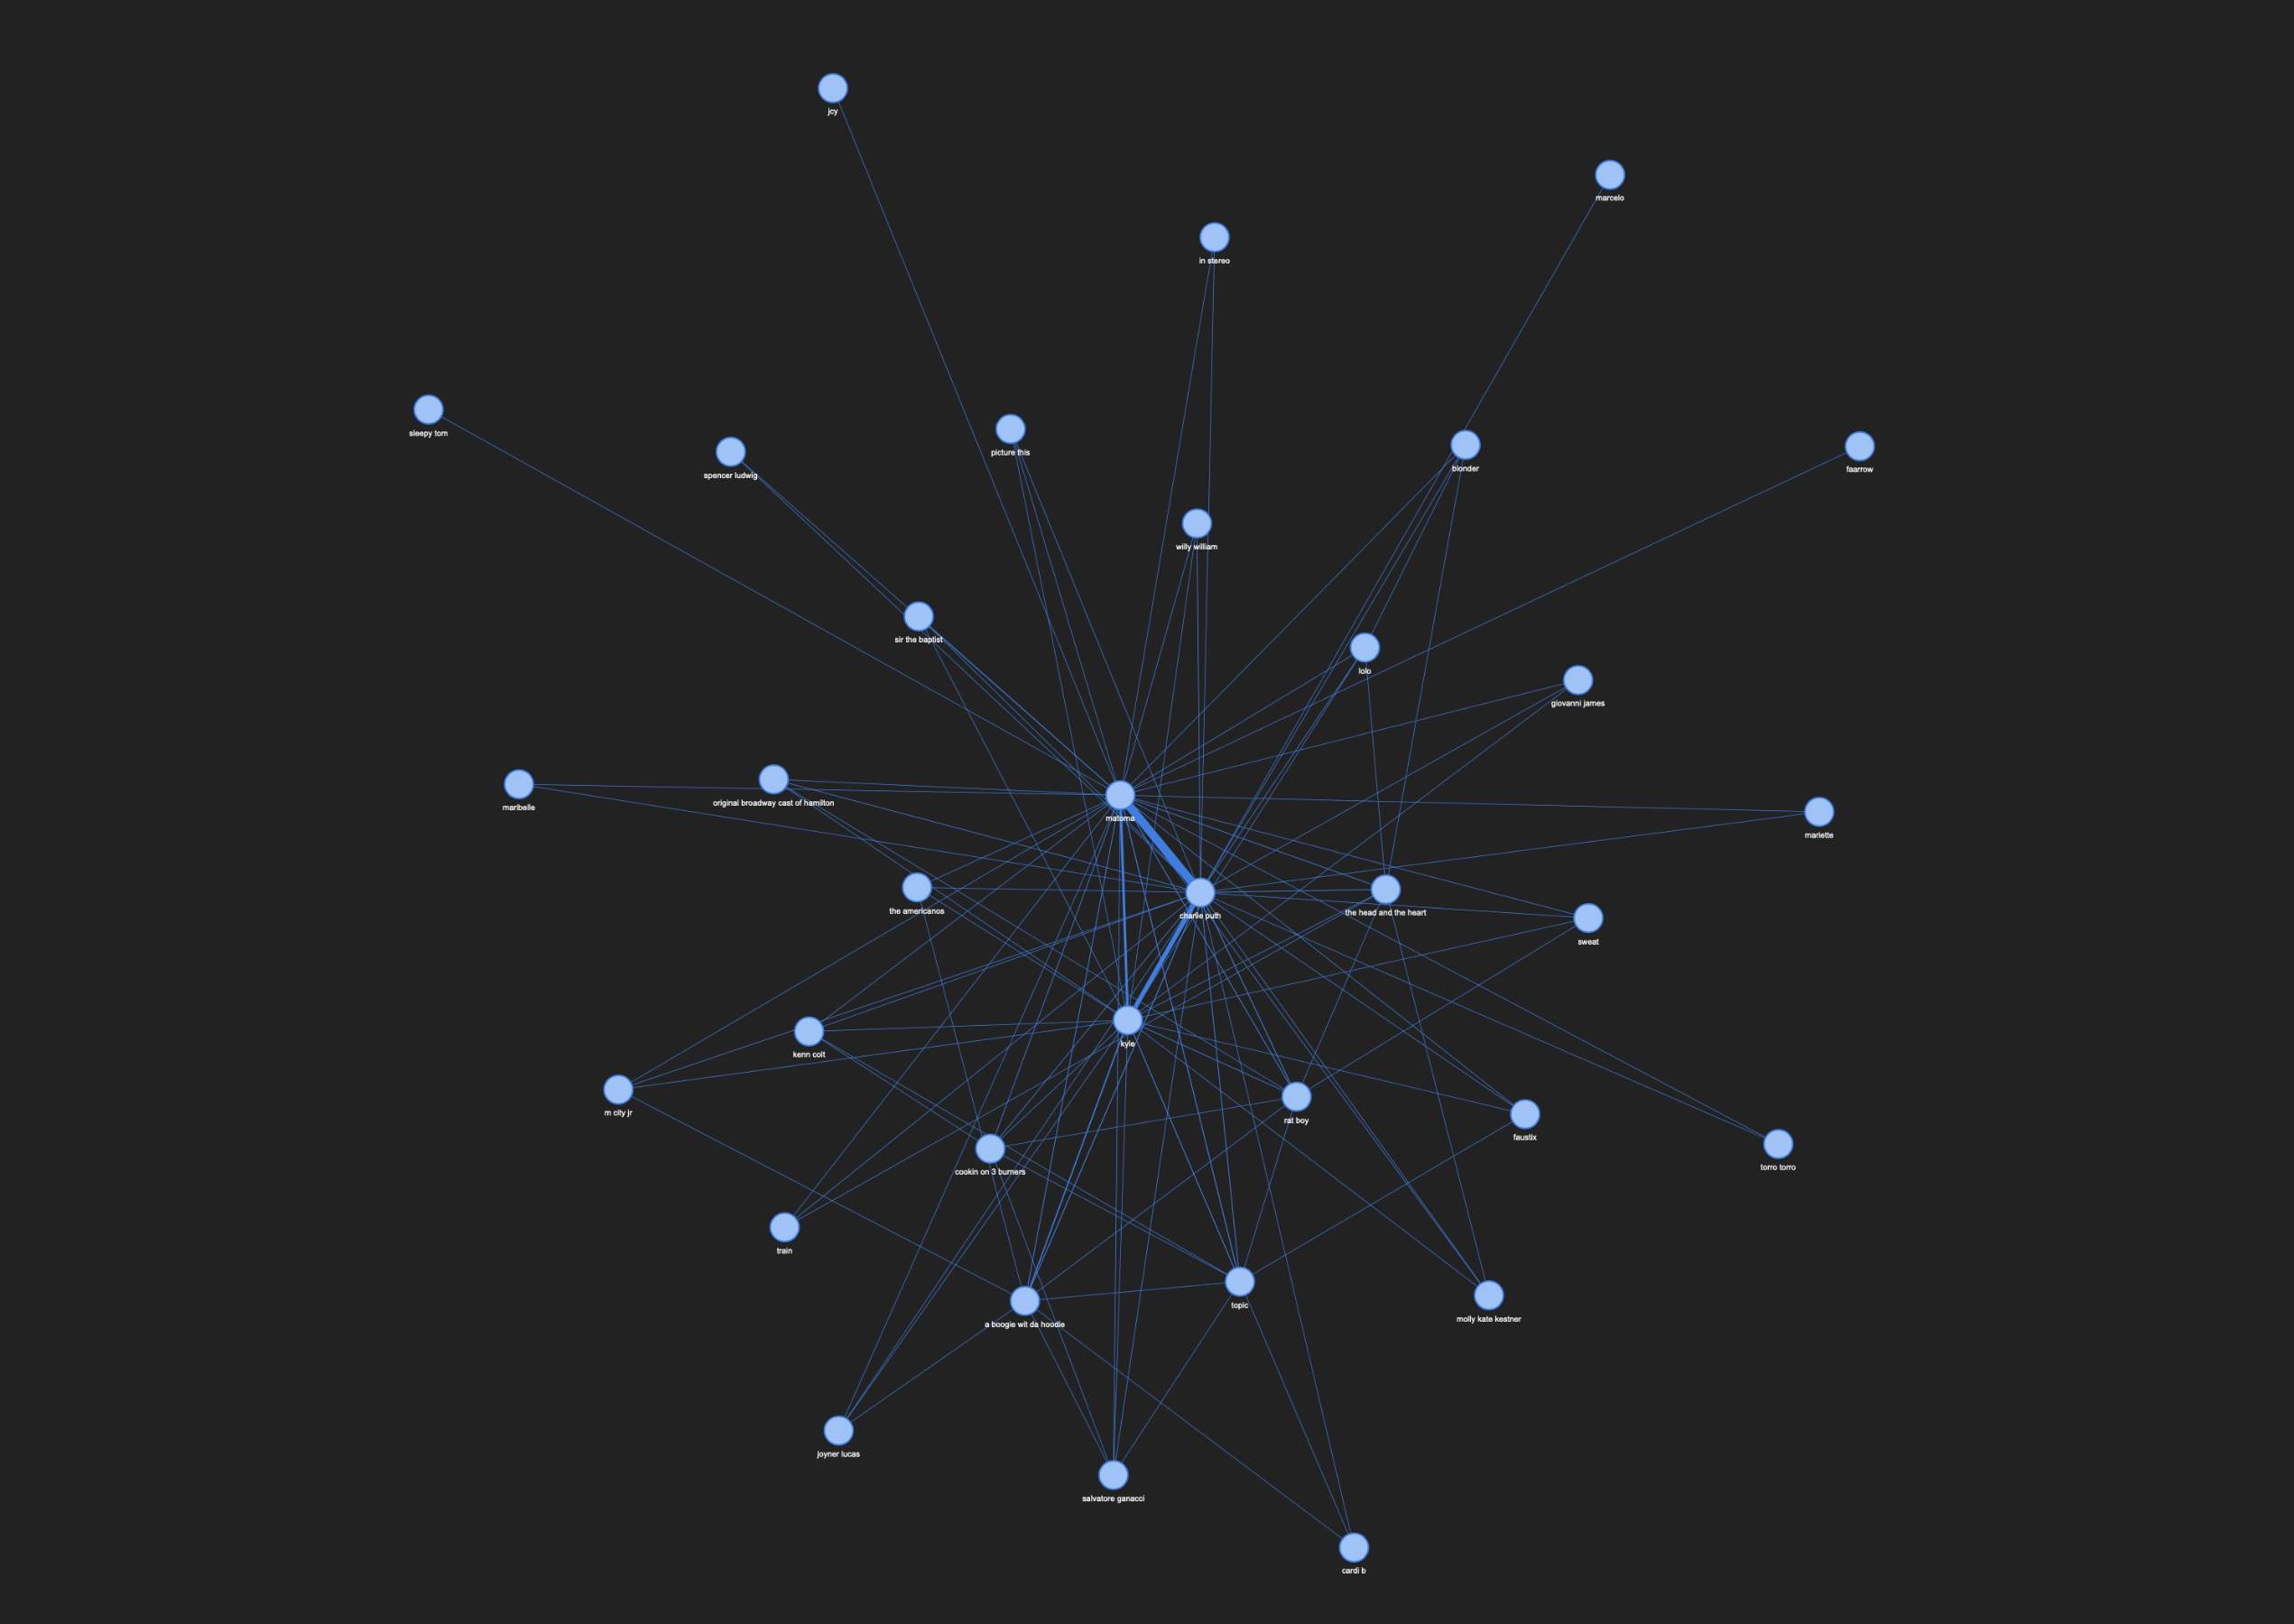

In [47]:
artist_net = Network(height='1200px', width='100%', bgcolor='#222222', font_color='white', notebook=True)
artist_net.barnes_hut()

sources = network_data_art2['artist1']
targets = network_data_art2['artist2']
weights = network_data_art2['customers_shared']

edge_data = zip(sources, targets, weights)

for e in edge_data:
    src = e[0]
    dst = e[1]
    w = e[2]

    artist_net.add_node(src, src, title=src, labels = True)
    artist_net.add_node(dst, dst, title=dst, labels = True)
    artist_net.add_edge(src, dst, value=w)

neighbor_map = artist_net.get_adj_list()
# artist_net.show('artist_network.html') # Interactive Plot
Image(filename='Artist_network.png')

The artists' network illustrates how artists are linked. Once again, centrality was measured according to how many customers the artsits share. Charlie Puth depicts a high instance of centrality. This was expected insofar Charlie Puth is also a successful artist in the dataset. On the other hand, artists on the outskirts of the network (i.e. jcy, sleepy tom, etc.) are linked to fewer other artists. This was further expected given that the artists are unsuccessful.

### Feature Engineering

When adding new additional features to the dataset, three categories were formulated to better encapsulate the causes of artists' success.
The categories are the following:
1.	Artist Features
2.	Playlist Features
3.	User-base features

### Artist features

The following variables were created specific to artists:

*	Stream count
*	Total Number of Users
*	Passion Score
*   Average Stream Length per Artist
*   Artist Major Genre

The metric passion score is a metric suggested to us by Warner business analysts. The metric is defined as the number of streams divided by the total number of users. 

Warner analysts believe that repeated listens by a user is a far more indicative future success that simply total number of listens or total unique users. By including this in your model, we can evaluate whether this metric in fact might be of any significance.

#### Stream count

In [48]:
# Getting stream counts per artist 
artist_streams = df_data.cleaned_names.value_counts() 
artist_streams = pd.DataFrame(artist_streams) 
artist_streams.reset_index(level = 0, inplace = True) 
artist_streams.columns = ['cleaned_names', 'streams_count_per_artist']

#### Total Number of Users

In [49]:
# Getting number of users per artist and creating a new dataframe 
df_temp = df_data[['cleaned_names','customer_id']]  
artist_users = df_temp.groupby(['cleaned_names']).nunique() 

# sorting and renaming columns to create easier interpretation
artist_users.rename(columns = {'customer_id':'users_per_artist'}, inplace = True)

# merging users per artist and stream counts to calculate passion score
df_artist_features = artist_streams.merge(artist_users, how = 'left', left_on = 'cleaned_names', right_index = True)
df_artist_features.head()

cleaned_names  streams_count_per_artist  users_per_artist
0  charlie puth                    445222            364964
1      dua lipa                    314389            259731
2  lukas graham                    309379            246075
3   cheat codes                    254804            224761
4        matoma                    210959            181327

#### Passion Score

In [50]:
# creating passion scores based on stream counts and users per artist 
df_artist_features['passion_score'] = df_artist_features['streams_count_per_artist'] / df_artist_features['users_per_artist']

#### Average Stream Length per Artist

In [51]:
# Calculate average stream length per artist
df2 = pd.DataFrame(df_data[['cleaned_names', 'customer_id', 'stream_length']])
df2 = df2.groupby('cleaned_names')['stream_length'].mean().reset_index(name='avg_stream_length')

# merging the average stream length and artist features together
df_artist_features[['streams_count_per_artist', 'users_per_artist']] = df_artist_features[['streams_count_per_artist', 'users_per_artist']].astype(float, errors = 'raise')
df_artist_features = df_artist_features.merge(df2, on = 'cleaned_names')

#### Arist Major Genre

In [52]:
df3 = pd.DataFrame(df_data[['cleaned_names', 'major_genre_code']])
df3 = df3.drop_duplicates()
df_artist_features = df_artist_features.merge(df3, on = 'cleaned_names')
df_artist_features

cleaned_names  streams_count_per_artist  users_per_artist  \
0        charlie puth                  445222.0          364964.0   
1            dua lipa                  314389.0          259731.0   
2        lukas graham                  309379.0          246075.0   
3         cheat codes                  254804.0          224761.0   
4              matoma                  210959.0          181327.0   
..                ...                       ...               ...   
439  rebecka karlsson                       1.0               1.0   
440       nick  simon                       1.0               1.0   
441      laboratorium                       1.0               1.0   
442           nunatak                       1.0               1.0   
443          coraluna                       1.0               1.0   

     passion_score  avg_stream_length major_genre_code  
0         1.219907         185.785552              Pop  
1         1.210441         178.100643              Pop  
2         1.257255         207.325161              Pop  
3         1.133666         184.465263            Dance  
4         1.163417         211.199119            Dance  
..             ...                ...              ...  
439       1.000000         189.000000              Pop  
440       1.000000         183.000000              Pop  
441       1.000000          45.000000             Jazz  
442       1.000000         228.000000              Pop  
443       1.000000         231.000000              Pop  

[444 rows x 6 columns]

### User-base features

The following variables were created specific to users:

*	Gender Percentage Breakdown
*	Age vector quantization 
*   Mobile Usage Percentage per Artist (Percent of Users Listening by Mobile per Artist)

#### Gender Percentage Breakdown

In [53]:
# getting gender split for each artist 
df_gender = pd.DataFrame(df_data[['cleaned_names', 'gender']])
df_gender['gender_binary'] = np.where(df_gender.gender == 'male', 1, 0)
df_gender.drop('gender', axis=1, inplace = True)

In [54]:
gender_percentage = df_gender.groupby('cleaned_names')['gender_binary'].mean()
gender_percentage = pd.DataFrame(gender_percentage)

# Only male percent is required due to collinearity
gender_percentage.rename(columns = {'gender_binary': 'male_percent'}, inplace = True)
gender_percentage.reset_index(inplace = True)

df_artist_features = df_artist_features.merge(gender_percentage, on = 'cleaned_names')

In [55]:
df_artist_features

cleaned_names  streams_count_per_artist  users_per_artist  \
0        charlie puth                  445222.0          364964.0   
1            dua lipa                  314389.0          259731.0   
2        lukas graham                  309379.0          246075.0   
3         cheat codes                  254804.0          224761.0   
4              matoma                  210959.0          181327.0   
..                ...                       ...               ...   
439  rebecka karlsson                       1.0               1.0   
440       nick  simon                       1.0               1.0   
441      laboratorium                       1.0               1.0   
442           nunatak                       1.0               1.0   
443          coraluna                       1.0               1.0   

     passion_score  avg_stream_length major_genre_code  male_percent  
0         1.219907         185.785552              Pop      0.417814  
1         1.210441         178.100643              Pop      0.401798  
2         1.257255         207.325161              Pop      0.513141  
3         1.133666         184.465263            Dance      0.448914  
4         1.163417         211.199119            Dance      0.521300  
..             ...                ...              ...           ...  
439       1.000000         189.000000              Pop      1.000000  
440       1.000000         183.000000              Pop      0.000000  
441       1.000000          45.000000             Jazz      1.000000  
442       1.000000         228.000000              Pop      0.000000  
443       1.000000         231.000000              Pop      1.000000  

[444 rows x 7 columns]

#### Age vector quantization

In [56]:
# creating age splits for each artist
df_age_cat = df_data[['cleaned_names', 'age', 'customer_id']]
df_age_cat = df_age_cat.drop_duplicates()

age_split = [0, 18, 28, 50, 80]
categories = ['youth', 'young adult', 'adult', 'senior']

# creating the bins for each age group
df_age_cat['age_cat'] = pd.cut(x=df_age_cat['age'], bins = age_split, labels = categories)

# dropping customer id as it is not longer needed
df_age_cat.drop('customer_id', inplace = True, axis = 1)

In [57]:
# Number of youths for each artist 
yuut = df_age_cat[df_age_cat['age_cat']=='youth']
yuut_count = pd.DataFrame(yuut.groupby('cleaned_names')['age_cat'].count())
yuut_count = yuut_count.rename(columns = {'age_cat':'youths'})

In [58]:
# creating a dataframe for young adult category
y_adult = df_age_cat[df_age_cat['age_cat']=='young adult']
y_adult_count = pd.DataFrame(y_adult.groupby('cleaned_names')['age_cat'].count())
y_adult_count = y_adult_count.rename(columns = {'age_cat':'y_adult'})

In [59]:
# creating a dataframe for adult category 
adult = df_age_cat[df_age_cat['age_cat']=='adult']
adult_count = pd.DataFrame(adult.groupby('cleaned_names')['age_cat'].count())
adult_count = adult_count.rename(columns = {'age_cat':'adult'})

In [60]:
# creating a dataframe for old category
old = df_age_cat[df_age_cat['age_cat']=='senior']
old_count = pd.DataFrame(old.groupby('cleaned_names')['age_cat'].count())
old_count = old_count.rename(columns = {'age_cat':'senior'})

In [61]:
# adding together all the new different dataframes 
df_age = pd.concat([yuut_count, y_adult_count, adult_count, old_count], axis = 1, sort = 'True').fillna(0)
df_age.reset_index(inplace = True)

In [62]:
# calculate percentages of total
df_age["sum"] = df_age.sum(axis=1)
df_age.loc[:,"youths":"senior"] = df_age.loc[:,"youths":"senior"].div(df_age["sum"], axis=0)
df_age.rename(columns={'youths':'perc_youth', 'y_adult':'perc_yadult', 'adult': 'perc_adult', 'senior': 'perc_senior'}, inplace=True)

In [63]:
# drop senior to avoid perfect multicollinearity
percent_age = df_age[['cleaned_names', 'perc_youth', 'perc_yadult', 'perc_adult']].copy()
# merging dataset to add in percentages of each age group
df_artist_features = df_artist_features.merge(percent_age, on = 'cleaned_names')

df_artist_features

cleaned_names  streams_count_per_artist  users_per_artist  \
0        charlie puth                  445222.0          364964.0   
1            dua lipa                  314389.0          259731.0   
2        lukas graham                  309379.0          246075.0   
3         cheat codes                  254804.0          224761.0   
4              matoma                  210959.0          181327.0   
..                ...                       ...               ...   
439  rebecka karlsson                       1.0               1.0   
440       nick  simon                       1.0               1.0   
441      laboratorium                       1.0               1.0   
442           nunatak                       1.0               1.0   
443          coraluna                       1.0               1.0   

     passion_score  avg_stream_length major_genre_code  male_percent  \
0         1.219907         185.785552              Pop      0.417814   
1         1.210441         178.100643              Pop      0.401798   
2         1.257255         207.325161              Pop      0.513141   
3         1.133666         184.465263            Dance      0.448914   
4         1.163417         211.199119            Dance      0.521300   
..             ...                ...              ...           ...   
439       1.000000         189.000000              Pop      1.000000   
440       1.000000         183.000000              Pop      0.000000   
441       1.000000          45.000000             Jazz      1.000000   
442       1.000000         228.000000              Pop      0.000000   
443       1.000000         231.000000              Pop      1.000000   

     perc_youth  perc_yadult  perc_adult  
0      0.203926     0.482174    0.274784  
1      0.160656     0.510026    0.295324  
2      0.196233     0.502344    0.266163  
3      0.201443     0.553474    0.219127  
4      0.141435     0.564873    0.264261  
..          ...          ...         ...  
439    0.000000     0.000000    1.000000  
440    1.000000     0.000000    0.000000  
441    0.000000     0.000000    1.000000  
442    0.000000     0.000000    1.000000  
443    0.000000     1.000000    0.000000  

[444 rows x 10 columns]

#### Mobile Usage Percentage per Artist

In [64]:
df_artist_features['mobile_perc'] = 1

for i in df_artists_full:
    temp = df_data.loc[df_data['cleaned_names'] == i]
    temp_df = pd.DataFrame(temp.stream_device.value_counts(normalize = True))
    test = 'mobile' in temp_df.index.values
    if test == True:
        mobile_percentage = temp_df['stream_device'].loc['mobile']
    else:
        mobile_percentage = 0

    df_artist_features.loc[df_artist_features['cleaned_names'] == i, 'mobile_perc'] = mobile_percentage

In [65]:
df_artist_features

cleaned_names  streams_count_per_artist  users_per_artist  \
0        charlie puth                  445222.0          364964.0   
1            dua lipa                  314389.0          259731.0   
2        lukas graham                  309379.0          246075.0   
3         cheat codes                  254804.0          224761.0   
4              matoma                  210959.0          181327.0   
..                ...                       ...               ...   
439  rebecka karlsson                       1.0               1.0   
440       nick  simon                       1.0               1.0   
441      laboratorium                       1.0               1.0   
442           nunatak                       1.0               1.0   
443          coraluna                       1.0               1.0   

     passion_score  avg_stream_length major_genre_code  male_percent  \
0         1.219907         185.785552              Pop      0.417814   
1         1.210441         178.100643              Pop      0.401798   
2         1.257255         207.325161              Pop      0.513141   
3         1.133666         184.465263            Dance      0.448914   
4         1.163417         211.199119            Dance      0.521300   
..             ...                ...              ...           ...   
439       1.000000         189.000000              Pop      1.000000   
440       1.000000         183.000000              Pop      0.000000   
441       1.000000          45.000000             Jazz      1.000000   
442       1.000000         228.000000              Pop      0.000000   
443       1.000000         231.000000              Pop      1.000000   

     perc_youth  perc_yadult  perc_adult  mobile_perc  
0      0.203926     0.482174    0.274784     0.656073  
1      0.160656     0.510026    0.295324     0.669909  
2      0.196233     0.502344    0.266163     0.645406  
3      0.201443     0.553474    0.219127     0.702061  
4      0.141435     0.564873    0.264261     0.674330  
..          ...          ...         ...          ...  
439    0.000000     0.000000    1.000000     0.000000  
440    1.000000     0.000000    0.000000     1.000000  
441    0.000000     0.000000    1.000000     0.000000  
442    0.000000     0.000000    1.000000     0.000000  
443    0.000000     1.000000    0.000000     1.000000  

[444 rows x 11 columns]

### Playlist Features

Given that we have over 19,000 playlists in our dataset or 600 artists, using the artists' playlists as categorical variables would lead to too many features and a very large, sparse matrix. 

To better explain the importance of playlists a singular metric of playlist passion score was engineered.

#### Prior Playlist Stream Counts

In [66]:
prior_playlists_df = df_data[["cleaned_names", "customer_id", "playlist_name"]]
prior_playlists_df = prior_playlists_df.dropna() # drop artists not in playlists

prior_playlists_streams = pd.DataFrame(prior_playlists_df.groupby("cleaned_names").playlist_name.value_counts())
prior_playlists_streams = prior_playlists_streams.rename(columns = {"playlist_name":"Prior Playlist Stream Counts"})

#### Prior Playlist Unique Users (Reach)

In [67]:
prior_playlists_users = pd.DataFrame(prior_playlists_df.groupby("playlist_name").customer_id.nunique())
prior_playlists_users = prior_playlists_users.rename(columns = {"customer_id":"Number of unique Streamers"})

In [68]:
# Merging both dataframes
playlist_features_df = pd.merge(prior_playlists_streams, prior_playlists_users, right_index = True, left_index = True)

In [69]:
# Playlist Passion Score
playlist_features_df["playlist_passion_score"] = (playlist_features_df["Prior Playlist Stream Counts"] / playlist_features_df["Number of unique Streamers"])

In [70]:
# calculate mean playlist passion score per artist
playlist_features = playlist_features_df.groupby('cleaned_names').agg({'playlist_passion_score': np.mean})
playlist_features.reset_index(inplace = True)
playlist_features

cleaned_names  playlist_passion_score
0                    17 memphis                0.041379
1                    90s update                0.061667
2                    99 percent                0.463559
3        a boogie wit da hoodie                0.524545
4                 a r i z o n a                0.356140
..                          ...                     ...
309                   yfn lucci                0.502938
310  youngboy never broke again                0.309623
311                   yvng swag                0.274384
312                   zac brown                0.178086
313                     zarcort                0.066667

[314 rows x 2 columns]

In [71]:
df_artist_features = pd.merge(df_artist_features, playlist_features, how = "left")
df_artist_features.fillna(0,inplace=True)

In [72]:
df_artist_features

cleaned_names  streams_count_per_artist  users_per_artist  \
0        charlie puth                  445222.0          364964.0   
1            dua lipa                  314389.0          259731.0   
2        lukas graham                  309379.0          246075.0   
3         cheat codes                  254804.0          224761.0   
4              matoma                  210959.0          181327.0   
..                ...                       ...               ...   
439  rebecka karlsson                       1.0               1.0   
440       nick  simon                       1.0               1.0   
441      laboratorium                       1.0               1.0   
442           nunatak                       1.0               1.0   
443          coraluna                       1.0               1.0   

     passion_score  avg_stream_length major_genre_code  male_percent  \
0         1.219907         185.785552              Pop      0.417814   
1         1.210441         178.100643              Pop      0.401798   
2         1.257255         207.325161              Pop      0.513141   
3         1.133666         184.465263            Dance      0.448914   
4         1.163417         211.199119            Dance      0.521300   
..             ...                ...              ...           ...   
439       1.000000         189.000000              Pop      1.000000   
440       1.000000         183.000000              Pop      0.000000   
441       1.000000          45.000000             Jazz      1.000000   
442       1.000000         228.000000              Pop      0.000000   
443       1.000000         231.000000              Pop      1.000000   

     perc_youth  perc_yadult  perc_adult  mobile_perc  playlist_passion_score  
0      0.203926     0.482174    0.274784     0.656073                0.585902  
1      0.160656     0.510026    0.295324     0.669909                0.419155  
2      0.196233     0.502344    0.266163     0.645406                0.545282  
3      0.201443     0.553474    0.219127     0.702061                0.457125  
4      0.141435     0.564873    0.264261     0.674330                0.501686  
..          ...          ...         ...          ...                     ...  
439    0.000000     0.000000    1.000000     0.000000                0.000000  
440    1.000000     0.000000    0.000000     1.000000                0.000000  
441    0.000000     0.000000    1.000000     0.000000                0.000000  
442    0.000000     0.000000    1.000000     0.000000                0.000000  
443    0.000000     1.000000    0.000000     1.000000                0.000000  

[444 rows x 12 columns]

### Successful Dependent Variable

In [73]:
successful = pd.DataFrame(df_data.groupby('cleaned_names').success.sum())
successful['successful_artist'] = np.where(successful['success'] > 0, 1, 0) # new variable where '0' means unsuccessful and '1' otherwise
successful.drop('success', axis = 1, inplace = True)
successful.reset_index(inplace = True)

In [74]:
df_artist_features = df_artist_features.merge(successful, on = 'cleaned_names')

In [75]:
df_artist_features.set_index(['cleaned_names'], append=True)
df_artist_features

cleaned_names  streams_count_per_artist  users_per_artist  \
0        charlie puth                  445222.0          364964.0   
1            dua lipa                  314389.0          259731.0   
2        lukas graham                  309379.0          246075.0   
3         cheat codes                  254804.0          224761.0   
4              matoma                  210959.0          181327.0   
..                ...                       ...               ...   
439  rebecka karlsson                       1.0               1.0   
440       nick  simon                       1.0               1.0   
441      laboratorium                       1.0               1.0   
442           nunatak                       1.0               1.0   
443          coraluna                       1.0               1.0   

     passion_score  avg_stream_length major_genre_code  male_percent  \
0         1.219907         185.785552              Pop      0.417814   
1         1.210441         178.100643              Pop      0.401798   
2         1.257255         207.325161              Pop      0.513141   
3         1.133666         184.465263            Dance      0.448914   
4         1.163417         211.199119            Dance      0.521300   
..             ...                ...              ...           ...   
439       1.000000         189.000000              Pop      1.000000   
440       1.000000         183.000000              Pop      0.000000   
441       1.000000          45.000000             Jazz      1.000000   
442       1.000000         228.000000              Pop      0.000000   
443       1.000000         231.000000              Pop      1.000000   

     perc_youth  perc_yadult  perc_adult  mobile_perc  playlist_passion_score  \
0      0.203926     0.482174    0.274784     0.656073                0.585902   
1      0.160656     0.510026    0.295324     0.669909                0.419155   
2      0.196233     0.502344    0.266163     0.645406                0.545282   
3      0.201443     0.553474    0.219127     0.702061                0.457125   
4      0.141435     0.564873    0.264261     0.674330                0.501686   
..          ...          ...         ...          ...                     ...   
439    0.000000     0.000000    1.000000     0.000000                0.000000   
440    1.000000     0.000000    0.000000     1.000000                0.000000   
441    0.000000     0.000000    1.000000     0.000000                0.000000   
442    0.000000     0.000000    1.000000     0.000000                0.000000   
443    0.000000     1.000000    0.000000     1.000000                0.000000   

     successful_artist  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  
..                 ...  
439                  0  
440                  0  
441                  0  
442                  0  
443                  0  

[444 rows x 13 columns]

#### Final Dataframe

In [76]:
df_fin = df_artist_features.copy()
df_fin

cleaned_names  streams_count_per_artist  users_per_artist  \
0        charlie puth                  445222.0          364964.0   
1            dua lipa                  314389.0          259731.0   
2        lukas graham                  309379.0          246075.0   
3         cheat codes                  254804.0          224761.0   
4              matoma                  210959.0          181327.0   
..                ...                       ...               ...   
439  rebecka karlsson                       1.0               1.0   
440       nick  simon                       1.0               1.0   
441      laboratorium                       1.0               1.0   
442           nunatak                       1.0               1.0   
443          coraluna                       1.0               1.0   

     passion_score  avg_stream_length major_genre_code  male_percent  \
0         1.219907         185.785552              Pop      0.417814   
1         1.210441         178.100643              Pop      0.401798   
2         1.257255         207.325161              Pop      0.513141   
3         1.133666         184.465263            Dance      0.448914   
4         1.163417         211.199119            Dance      0.521300   
..             ...                ...              ...           ...   
439       1.000000         189.000000              Pop      1.000000   
440       1.000000         183.000000              Pop      0.000000   
441       1.000000          45.000000             Jazz      1.000000   
442       1.000000         228.000000              Pop      0.000000   
443       1.000000         231.000000              Pop      1.000000   

     perc_youth  perc_yadult  perc_adult  mobile_perc  playlist_passion_score  \
0      0.203926     0.482174    0.274784     0.656073                0.585902   
1      0.160656     0.510026    0.295324     0.669909                0.419155   
2      0.196233     0.502344    0.266163     0.645406                0.545282   
3      0.201443     0.553474    0.219127     0.702061                0.457125   
4      0.141435     0.564873    0.264261     0.674330                0.501686   
..          ...          ...         ...          ...                     ...   
439    0.000000     0.000000    1.000000     0.000000                0.000000   
440    1.000000     0.000000    0.000000     1.000000                0.000000   
441    0.000000     0.000000    1.000000     0.000000                0.000000   
442    0.000000     0.000000    1.000000     0.000000                0.000000   
443    0.000000     1.000000    0.000000     1.000000                0.000000   

     successful_artist  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  
..                 ...  
439                  0  
440                  0  
441                  0  
442                  0  
443                  0  

[444 rows x 13 columns]

### Encoding Categorical Variables

Following the encoding of the genre categorical variables, it was necessarry to drop the first value in order to avoid perfect multicollinearity.

In [77]:
df_fin = pd.get_dummies(df_fin, columns = ['major_genre_code'], drop_first=True)

#### Visualising feature engineered variables

In [78]:
df_fin_copy = df_fin.copy()

In [79]:
df_fin_copy = df_fin_copy.drop("cleaned_names", axis=1).copy()

In [80]:
df_fin_copy = df_fin_copy.iloc[:,:11].copy()

In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_fin_copy = scaler.fit_transform(df_fin_copy)
df_fin_copy = pd.DataFrame(df_fin_copy, columns = ["streams_count_per_artist","users_per_artist","passion_score","avg_stream_length","male_percent","percent youth","percent y_adult","percent adult","mobile_perc","playlist_passion_score", "successful_artist"]).copy()

df_succ = df_fin_copy[df_fin_copy["successful_artist"] > 0]
df_unsucc = df_fin_copy[df_fin_copy["successful_artist"] <= 0]

succ_mean = df_succ.mean()
df_succ_mean = succ_mean.to_frame()
df_succ_mean.reset_index(inplace=True)
df_succ_mean.rename(columns = {'index': 'Features', 0:'MinMax_Normalised_Value'}, inplace=True)

unsucc_mean = df_unsucc.mean()
df_unsucc_mean = unsucc_mean.to_frame()
df_unsucc_mean.reset_index(inplace=True)
df_unsucc_mean.rename(columns = {'index': 'Features', 0:'MinMax_Normalised_Value'}, inplace=True)

In [82]:
import plotly.graph_objects as go

categories = ["Streams Count per Artist","Users per Artist","Passion Score","Average Stream Length","Male Percent",
              "Percent Youth","Percent Y-Adult","Percent Adult","Mobile Percent",
              "Playlist Average Passion Score"]

fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=df_succ_mean.MinMax_Normalised_Value,
      theta=categories,
      fill='toself',
      name='Successful'))
fig.add_trace(go.Scatterpolar(
      r=df_unsucc_mean.MinMax_Normalised_Value,
      theta=categories,
      fill='toself',
      name='Unsuccessful'))
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1])),
  showlegend=True)

fig.show()

The radar plot indicates that the artist features for both successful and unsuccessful artists are quite similar. 

The most relevant difference stems from the distirbution of listeners. Specifically, unsuccessful artists tend to be stremed more by adults, while successful artists tend to be stremed by younger customers. This may be linked to the positively skewed age distribution priorly mentioned.

### Principal Component Analysis

The data also contains a partial region code of the listener. We might want to consider including the regional breakdown of streams per artist as a feature of our model, to know if streams for certain regions are particularly influential on the future performance of an artist.

However, we have over 400 unique regions and like playlists, including them all would lead to too many features and a large sparse matrix. One way in which to extract relevant ‘generalized’ features of each region would be to incorporate census and demographic data, from publicly available datasets.

Here we will use Principle Component Analysis (PCA), a dimensionality reduction technique, to capture the regional variation in stream count.

PCA captures the majority of variation in the original feature set and represents it as a set of new orthogonal variables. Each ‘component’ of PCA is a linear combination of every feature, i.e. playlist in the dataset. We used scikit-learn’s PCA module (Pedregosa, et al., 2011) for generating PCA components.

In [83]:
# get region code values for all artists
full_regions = pd.DataFrame(df_data.groupby(['cleaned_names','region_code']).size().reset_index(name='stream_counts'))
full_regions = full_regions.pivot_table(values='stream_counts', index='cleaned_names', columns = 'region_code', aggfunc='first')
full_regions = full_regions.reset_index()
full_regions = full_regions.fillna(0)

In [84]:
# Find artists with no region codes to drop from original dataset
region_names = list(full_regions['cleaned_names'])
final_names = list(df_fin['cleaned_names'])
c = [x for x in final_names if x not in region_names]
c

['coro de monjes del monasterio benedictino de santo domingo de silos',
 'tuah saja',
 'danny maky',
 'dewi yull',
 'painters and dockers',
 'coraluna']

In [85]:
# drop previously listed artists
df_fin = df_fin[~df_fin['cleaned_names'].isin(c)].copy()

In [86]:
train_region, test_region = train_test_split(df_fin, test_size = 0.2, random_state = 80)

In [87]:
train_artists = train_region[['cleaned_names']].copy()
test_artists = test_region[['cleaned_names']].copy()

In [88]:
train_artist_region = train_artists.merge(full_regions, how='left', on='cleaned_names')
test_artist_region = test_artists.merge(full_regions, how='left', on='cleaned_names')

In [89]:
scaler_PCA = StandardScaler()
train_artist_region.iloc[:, 1:] = scaler_PCA.fit_transform(train_artist_region.iloc[:, 1:])
test_artist_region.iloc[:, 1:] = scaler_PCA.transform(test_artist_region.iloc[:, 1:])

pca = PCA(n_components=10)
PCA_region_train = pca.fit_transform(train_artist_region.iloc[:, 1:])
PCA_region_test = pca.transform(test_artist_region.iloc[:, 1:])

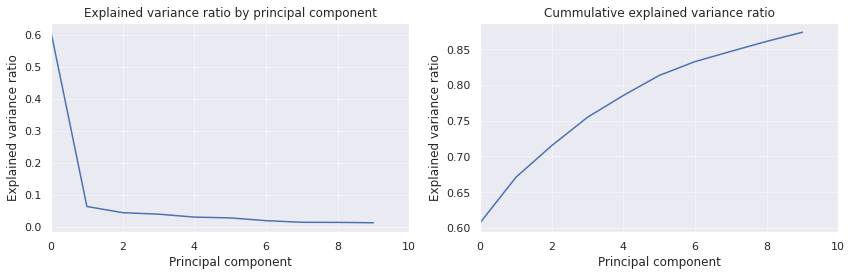

In [132]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(pca.n_components_), pca.explained_variance_ratio_)
plt.xlabel('Principal component')
plt.xlim(0,10)
plt.ylabel('Explained variance ratio')
plt.title('Explained variance ratio by principal component')
plt.grid(True, alpha = 0.4)
plt.subplot(1, 2, 2)
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('Principal component')
plt.xlim(0,10)
plt.ylabel('Explained variance ratio')
plt.title('Cummulative explained variance ratio')
plt.grid(True, alpha = 0.4)
plt.tight_layout()

plt.show()

As illustrated by the figures above, 10 PCA features can explain approximately 85% of the variance of the regional variables.

In [91]:
print(pca.explained_variance_ratio_)
print('Total variance explained: '+ str(np.sum(pca.explained_variance_ratio_)))

[0.60714369 0.06359556 0.04427207 0.03965681 0.03045965 0.02794628
 0.01935565 0.01429678 0.01398777 0.01275909]
Total variance explained: 0.8734733450420324


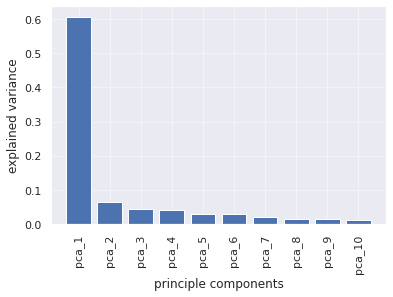

In [128]:
pca_cols = ['pca_'+ str(i) for i in range(1,11)]
df_PCA_train = pd.DataFrame(PCA_region_train, columns = pca_cols)
df_PCA_train['cleaned_names'] = list(train_region.cleaned_names.values)

df_PCA_test = pd.DataFrame(PCA_region_test, columns = pca_cols)
df_PCA_test['cleaned_names'] = list(test_region.cleaned_names.values)


plt.bar(pca_cols,pca.explained_variance_ratio_)
plt.xticks(rotation = 90)
plt.xlabel('principle components')
plt.grid(True, alpha = 0.4)
plt.ylabel('explained variance')
plt.show()

The first feature explains approximately 60% of the variance.

In [93]:
final_train = train_region.merge(df_PCA_train, on = 'cleaned_names')
final_test = test_region.merge(df_PCA_test, on = 'cleaned_names')

In [94]:
final_train.set_index('cleaned_names', inplace=True)
final_test.set_index('cleaned_names', inplace=True)

### Multi-collinearity

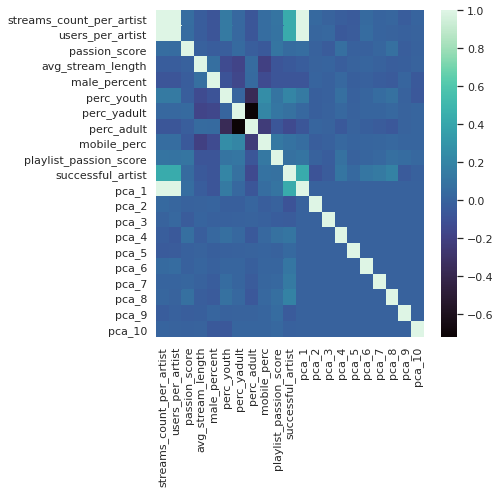

In [95]:
# Correlation matrix
corr = final_train.loc[:,~final_train.columns.str.startswith('major')].corr()
plt.figure(figsize= (6,6))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap = 'mako')
plt.show()

In [96]:
# Drop users per artist due to high collinearity
final_train.drop('users_per_artist', axis =1, inplace = True )
final_test.drop('users_per_artist', axis =1, inplace = True )

### Scaling Numerical Features

We used StandardScaler on the numerical variables to account for varying scales across the features and further ensure that model performance was optimized across.

In [97]:
scaler = StandardScaler()
scaler.fit(final_train.iloc[:,:9]) # scaling only the continous variables using only the train data
final_train.iloc[:,:9]  = scaler.transform(final_train.iloc[:,:9]) #transforming both train and test
final_test.iloc[:,:9]  = scaler.transform(final_test.iloc[:,:9])

### PCA Visualisation

In [98]:
x_train = final_train.drop('successful_artist', axis=1)
y_train = final_train.successful_artist

x_test = final_test.drop('successful_artist', axis=1)
y_test = final_test.successful_artist

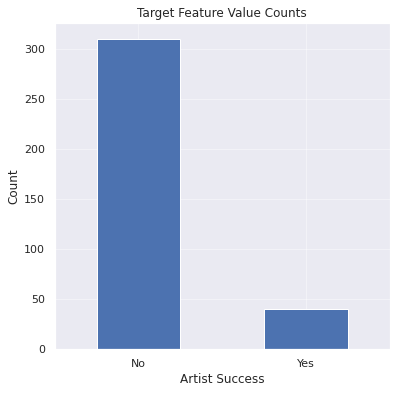

In [99]:
# Show imbalance in data
plt.figure(figsize= (6,6))
y_train.value_counts().plot(kind = 'bar')
plt.title('Target Feature Value Counts')
plt.xlabel('Artist Success')
plt.xticks(ticks = [0,1], labels = ['No', 'Yes'], rotation = 0)
plt.ylabel('Count')
plt.grid(True, alpha=0.4)

As depicted by the plot above, there was an evident class imablance within the dataset, with successful artists being a minosrity class.

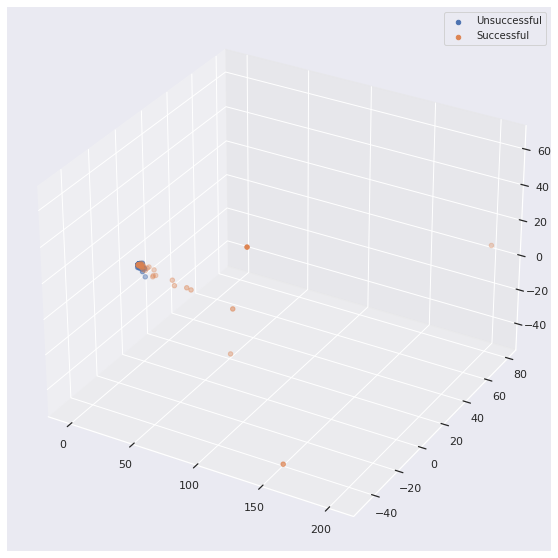

In [100]:
pca_vis = PCA(n_components=3)

pca_data = pca_vis.fit_transform(x_train)
pca_data = np.vstack((pca_data.T, y_train)).T
pca_df = pd.DataFrame(data = pca_data, columns = ('x', 'y', 'z', 'label'))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')

x = pca_df['x']
y = pca_df['y']
z = pca_df['z']

for label in pca_df.label.unique():
    ax.scatter(pca_df.x[pca_df.label==label],
               pca_df.y[pca_df.label==label],
               pca_df.z[pca_df.label==label],
               label=label)

ax.legend(labels = ['Unsuccessful', 'Successful'], fontsize = 10)

plt.show()

### SMOTENN To Deal With Class Imbalance

Given the natural bias in our data, i.e. there are more cases of failure than of success in the training and test sets; there is a strong bias toward predicting ‘failure’. To give us a more even class balance, without losing too much data, we will use SMOTEENN to achieve a better class balance.

In [101]:
smenn = SMOTEENN()
x_train_sme, y_train_sme = smenn.fit_resample(x_train, y_train)

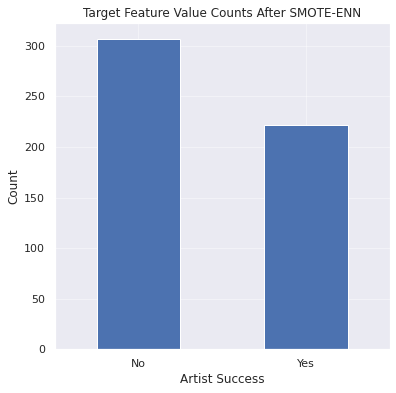

In [102]:
# Show data after SMOTEENN
plt.figure(figsize= (6,6))
y_train_sme.value_counts().plot(kind = 'bar')
plt.title('Target Feature Value Counts After SMOTE-ENN')
plt.xlabel('Artist Success')
plt.xticks(ticks = [0,1], labels = ['No', 'Yes'], rotation = 0)
plt.ylabel('Count')
plt.grid(True, alpha=0.4)

As illustrated by the graph above, the imbalance was alleviated.

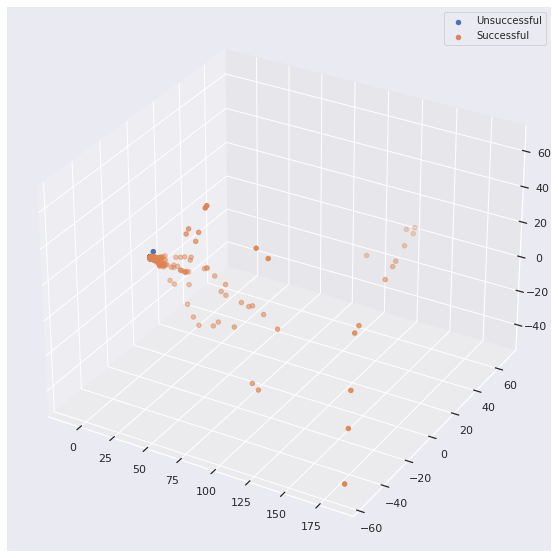

In [103]:
pca_vis = PCA(n_components=3)

pca_data = pca_vis.fit_transform(x_train_sme)
pca_data = np.vstack((pca_data.T, y_train_sme)).T
pca_df = pd.DataFrame(data = pca_data, columns = ('x', 'y', 'z', 'label'))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')

x = pca_df['x']
y = pca_df['y']
z = pca_df['z']

for label in pca_df.label.unique():
    ax.scatter(pca_df.x[pca_df.label==label],
               pca_df.y[pca_df.label==label],
               pca_df.z[pca_df.label==label],
               label=label)

ax.legend(labels = ['Unsuccessful', 'Successful'], fontsize = 10)

plt.show()

## Model Evaluation

To predict artist success, linear, tree and ensable based models are utilised. Specifically, the following models are explicitly listed:

* Logistic Regression
* Decision Tree
* Random Forest
* Support vVctor Machines
* XGBoost
* Voting Classifier

Furthermore, a deep learning technique using a neural network is also analysed in order to identify its performance in predicting successful artists with its performance metric evaluated on the test set.


The accuracy score with cross validation is used to evaluate the models as SMOTEENN improved the class imbalance. A grid search is further utilised to hypertune each model's parameters . Once the final model is chosen the f1 score can be calculated using the held out test set.

In [104]:
performance = pd.DataFrame(columns=['Accuracy'])

### Logistic Regression

In [105]:
log_reg = LogisticRegression(random_state = 88)
log_params = {'C': np.arange(0.5, 1.5, 0.1),
             'max_iter': [100, 1000,2500]}

gs_log_reg = GridSearchCV(log_reg, log_params, cv=5, verbose=1, n_jobs=-1, scoring='accuracy')
gs_log_reg.fit(x_train_sme, y_train_sme)

print("Best parameters:", gs_log_reg.best_params_)
print()
print("Train f1 score:", gs_log_reg.score(x_train_sme, y_train_sme))
print("Cross-validated f1 score:", gs_log_reg.best_score_)


performance.loc['Logistic Regression']= [gs_log_reg.best_score_]

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters: {'C': 0.9999999999999999, 'max_iter': 100}

Train f1 score: 0.9357277882797732
Cross-validated f1 score: 0.9281761006289309


### Decision Tree

In [106]:
model_tree = DecisionTreeClassifier(random_state = 88)
tree_params = {'max_depth': np.arange(10, 50, 5),
               'min_samples_split' : np.arange(5, 35, 5),
               'min_samples_leaf': np.arange(2, 15, 5)}


gs_tree = GridSearchCV(model_tree, tree_params, cv = 5, verbose = 1, n_jobs = -1, scoring='accuracy')
gs_tree.fit(x_train_sme, y_train_sme)

print("Best parameters:", gs_tree.best_params_)
print()
print("Train accuracy score:", gs_tree.score(x_train_sme, y_train_sme))
print("Cross-validated accuracy score:", gs_tree.best_score_)


performance.loc['Decision Tree']= [gs_tree.best_score_]

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}

Train accuracy score: 0.9867674858223062
Cross-validated accuracy score: 0.9490206648697214


### Random Forest

In [107]:
forest_model = RandomForestClassifier(random_state = 88)
params_forest = {'n_estimators' : [50, 100, 200],
                  'max_depth':[10,25,40],
                  'min_samples_split' : [2,5,10],
                 'min_samples_leaf': np.arange(2, 15, 5)}

gs_forest = GridSearchCV(forest_model, params_forest, cv = 5, verbose = 1, n_jobs = -1, scoring='accuracy')
gs_forest.fit(x_train_sme, y_train_sme)

print("Best parameters:", gs_forest.best_params_)
print()
print("Train accuracy score:", gs_forest.score(x_train_sme, y_train_sme))
print("Cross-validated accuracy score:", gs_forest.best_score_)


performance.loc['Random Forest']= [gs_forest.best_score_]

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'max_depth': 25, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

Train accuracy score: 0.996219281663516
Cross-validated accuracy score: 0.9679065588499551


### Support Vector Machine

In [108]:
svc_model = SVC(random_state=88)
svc_params = {'C': [0.01, 0.1, 1, 5, 10, 50, 100],
              'kernel': ['rbf', 'poly', 'sigmoid']}

gs_svc = GridSearchCV(svc_model, svc_params, cv = 5, verbose = 1, n_jobs = -1, scoring='accuracy')
gs_svc.fit(x_train_sme, y_train_sme)

print("Best parameters:", gs_svc.best_params_)
print()
print("Train accuracy score:", gs_svc.score(x_train_sme, y_train_sme))
print("Cross-validated accuracy score:", gs_svc.best_score_)


performance.loc['Support Vector Machine']= [gs_svc.best_score_]

Fitting 5 folds for each of 21 candidates, totalling 105 fits
Best parameters: {'C': 50, 'kernel': 'rbf'}

Train accuracy score: 0.9376181474480151
Cross-validated accuracy score: 0.9262713387241689


### XGBoost

The XGBoost and the voting classifier were not hypertuned due to the considerable time required.

In [109]:
xgboost_model = XGBClassifier(eval_metric = 'logloss', use_label_encoder=False,seed = 88)
xgboost_model.fit(x_train_sme, y_train_sme)

print("Train accuracy score:", xgboost_model.score(x_train_sme, y_train_sme))
print("Cross-validated accuracy score:", cross_val_score(xgboost_model, x_train_sme, y_train_sme, cv = 5).mean())

performance.loc['XGBoost']= [cross_val_score(xgboost_model, x_train_sme, y_train_sme, cv = 5).mean()]

Train accuracy score: 1.0
Cross-validated accuracy score: 0.973548966756514


### Voting Classifier

In [110]:
voting_class = VotingClassifier([('log', LogisticRegression(C = 1.4, max_iter = 100, random_state = 88)),
                                 ('xgb', xgboost_model),
                                 ('forest', RandomForestClassifier(max_depth = 10, min_samples_leaf = 2,
                                                                   min_samples_split = 2, n_estimators = 200, random_state = 88))])

voting_class.fit(x_train_sme, y_train_sme)
print("Train accuracy score:", voting_class.score(x_train_sme, y_train_sme))
print("Cross-validated accuracy score:", cross_val_score(voting_class, x_train_sme, y_train_sme, cv = 5).mean())

performance.loc['Voting Classifier']= [cross_val_score(voting_class, x_train_sme, y_train_sme, cv = 5).mean()]

Train accuracy score: 0.994328922495274
Cross-validated accuracy score: 0.9716621743036837


In [111]:
performance.reset_index(inplace = True)
performance = performance.rename(columns = {'index':"Algorithm"})

In [112]:
performance

Algorithm  Accuracy
0     Logistic Regression  0.928176
1           Decision Tree  0.949021
2           Random Forest  0.967907
3  Support Vector Machine  0.926271
4                 XGBoost  0.973549
5       Voting Classifier  0.971662

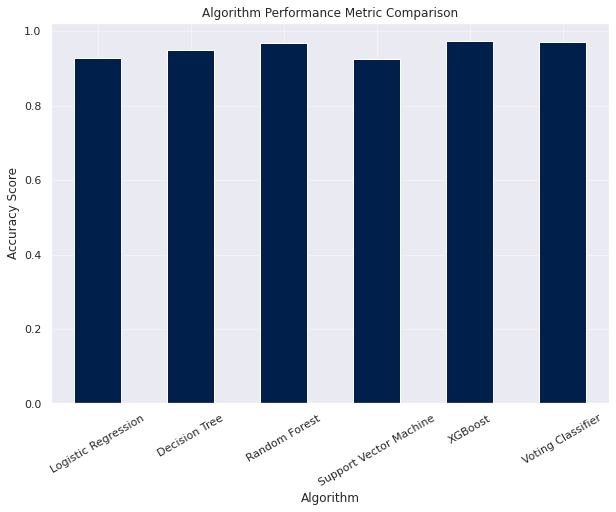

In [134]:
performance.plot(x="Algorithm", y=["Accuracy"], kind="bar", figsize = (10,7), color= '#011f4b', legend=False)
plt.title('Algorithm Performance Metric Comparison')
plt.xticks(rotation = 30)
plt.ylabel('Accuracy Score')
plt.grid(True, alpha = 0.4)

plt.show()

As depicted by the graph above, XGBoost is the best performing model with an accuracy score of approximately 97.3% on the training set.

### Neural Network

In [114]:
# !pip install torch

In [115]:
import torch
import random
RAND_SEED = 88
random.seed(RAND_SEED)

In [116]:
class MLP(torch.nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, hidden_size_3, output_size=1):
        super(MLP, self).__init__()
        self.input_size = input_size
        self.hidden_size_1  = hidden_size_1
        self.hidden_size_2  = hidden_size_2
        self.hidden_size_3  = hidden_size_3
        self.output_size = output_size
        
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size_1)
        self.fc2 = torch.nn.Linear(self.hidden_size_1, self.hidden_size_2)
        self.fc3 = torch.nn.Linear(self.hidden_size_2, self.hidden_size_3)
        self.fc4 = torch.nn.Linear(self.hidden_size_3, self.output_size)  # single output node
        
        # Activation functions
        self.relu = torch.nn.ReLU()
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, x):
        if type(x) == np.ndarray:
            x = torch.FloatTensor(x)
        hidden_1 = self.fc1(x)
        activation_1 = self.relu(hidden_1)
        hidden_2 = self.fc2(activation_1)
        activation_2 = self.relu(hidden_2)
        hidden_3 = self.fc3(activation_2)
        activation_3 = self.relu(hidden_3)
        output = self.fc4(activation_3) 
        output = self.sigmoid(output)
        return output
    
    def predict(self, x, threshold=0.5):
        return (self.forward(x) >= threshold).float() * 1

In [117]:
def predict(probabilities, threshold=0.5):
    return (probabilities >= threshold).float() * 1

In [118]:
model = MLP(input_size=x_train_sme.shape[1], hidden_size_1=5, hidden_size_2=5, hidden_size_3=5, output_size=1)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

In [119]:
x_train_sme_array = x_train_sme.to_numpy()
y_train_sme_array = y_train_sme.to_numpy()

In [120]:
x_test_array = x_test.to_numpy()
y_test_array = y_test.to_numpy()

In [121]:
# organise data into mini-batches
from torch.utils.data import DataLoader

batch_size = 20
# training on the full dataset
train_loader = DataLoader(list(zip(x_train_sme_array, y_train_sme_array)), batch_size=batch_size, shuffle=True)

In [122]:
# training the model
def train(model, train_loader, criterion, optimizer, num_epochs=100):
    model.train()
    for epoch in range(num_epochs):
        train_loss = 0.0
        for data, target in train_loader:
            data, target = data.float(), target.float()
            optimizer.zero_grad()
            # Forward pass
            y_pred_proba = model(data)
            # Compute Loss
            loss = criterion(y_pred_proba.squeeze(), torch.FloatTensor(target))
            # Backward pass
            loss.backward()
            optimizer.step()
            # Update the running training loss
            train_loss += loss.item()*data.size(0)
            
        # Calculate average loss over an epoch
        train_loss = train_loss/len(train_loader.dataset)
        
train(model, train_loader, criterion, optimizer)

In [123]:
# evaluate our model's performance after training
model.eval()
y_pred_proba = model(torch.FloatTensor(x_test_array))
y_pred = predict(y_pred_proba)
after_train = criterion(y_pred_proba.squeeze(), torch.FloatTensor(y_test_array))

nn_accuracy = accuracy_score(y_test_array, y_pred.squeeze())
nn_precision = precision_score(y_test_array, y_pred.squeeze())
nn_recall = recall_score(y_test_array, y_pred.squeeze())
nn_f1_score = f1_score(y_test_array, y_pred.squeeze())

print("The binary cross-entropy loss of our model is {:.4f}.".format(after_train))
print("Neural network accuracy score is {:.2f}".format(nn_accuracy))
print("Neural network precision score is {:.2f}".format(nn_precision))
print("Neural network recall score is {:.2f}".format(nn_recall))
print("Neural network F1-score is {:.2f}".format(nn_f1_score))

The binary cross-entropy loss of our model is 2.6031.
Neural network accuracy score is 0.81
Neural network precision score is 0.46
Neural network recall score is 0.87
Neural network F1-score is 0.60


The accuracy score for the neural network is 81% on the test set. This value shall be evaluated against the final model's scores.

### Best Model & Confusion Matrix

The best model was the XGBoost classifier, depicting the highest value of accuracy.

To get a better idea of the quality of our predictions, we can plot a confusion matrix and ROC curve.

A confusion matrix is a technique for summarizing the performance of a classification algorithm that allows visualization of the performance of an algorithm.

Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa).

The confusion matrix shows the ways in which your classification model is confused when it makes predictions. It gives you insight not only into the errors being made by your classifier but more importantly the types of errors that are being made.

              precision    recall  f1-score   support

           0       0.98      0.84      0.90        73
           1       0.54      0.93      0.68        15

    accuracy                           0.85        88
   macro avg       0.76      0.88      0.79        88
weighted avg       0.91      0.85      0.87        88



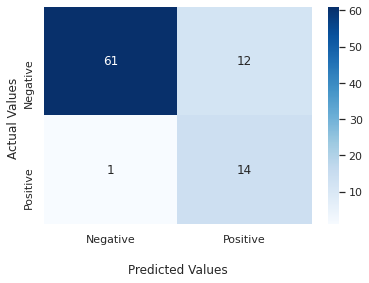

In [141]:
# XGBoost on test set
boost_test_model = xgboost_model
boost_test_model.fit(x_train_sme, y_train_sme)
y_pred_final_boost = boost_test_model.predict(x_test)


print(classification_report(y_test,y_pred_final_boost))

ax = sns.heatmap(confusion_matrix(y_test, y_pred_final_boost),annot=True, fmt=".0f", cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive']);

The confusion matrix illustrates that the XGBoost classifer does not depict an optimal prediction of false negative values. Since the final dataset portrays a low class volume of success, the model may find it hard to distinguish the determinant features of successful artists. The accuracy on the test set was also higher than the neural network.

### ROC Curve

Receiver Operating Characteristic (ROC) curves show the ability of the model to classify subjects correctly across a range of decision thresholds, i.e. it plots the True Positive Rate vs. False Positive Rate at every probability threshold.

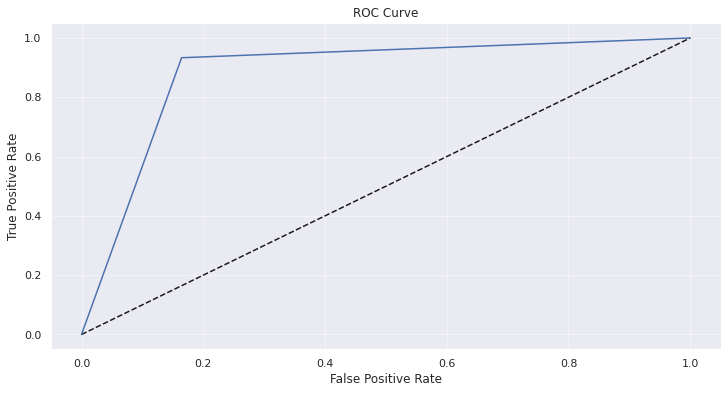

In [144]:
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_final_boost)

# Plot ROC curve
plt.figure(figsize = (12,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid(True, alpha=0.4)

plt.show()

### Feature Importance

Following the identification of the best performing model (XGBoost), the most significant features should also be assessed. The features shall serve as a means of determining what characteristics are key in successful artists.

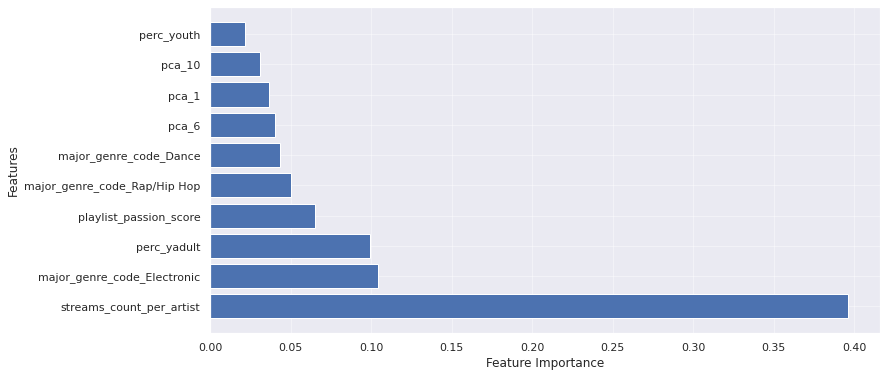

In [147]:
# Get feature importance from XGBoost
plt.figure(figsize = (12,6))
sorted_idx = list(boost_test_model.feature_importances_.argsort()[::-1][:10])
plt.barh(x_train.columns[sorted_idx], boost_test_model.feature_importances_[sorted_idx])
plt.xlabel('Feature Importance')
plt.grid(True, alpha = 0.4)

plt.ylabel('Features');

The plot above indicates that the stream count per artist is the defining feature to predict artist success. The genre and PCA features regarding the regions are also very important variables according to the final model.

## Conclusion

This study explored Spotify streaming data to help predict whether an artist will be considered a success based on their appearance on a target playlist. Using PCA to incorporate region features, a processed final dataset was run with machine learning models. Each model was hypertuned apart from two and the XGBoost classifier was deemed the model which performed the best on the data. Feature importance using the final XGBoost classifier indicated that stream count per artist, genres and the PCA features were crucial factors in determining artist success. 

This model can be utilised in practice by musician scouts for example to help identify artists with great potential. Spotify can also choose to incorporate these artists within their key playlists. The confusion matrix helps indicate how possible false positives and negatives can influence investment decisions made to promote certain artists.